[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/arvidl/ELMED219-2026/blob/main/Lab0-ML/notebooks/02-Binaer_klassifikasjon.ipynb)

Versjon 28.11.2025, A. Lundervold / A. S. Lundervold

# Binær klassifikasjon

Velkommen til denne notebooken om **binær klassifikasjon** – en av de mest grunnleggende og viktige oppgavene innen maskinlæring!

I denne notebooken skal vi:
- Forstå forskjellen mellom **klassifikasjon** og **regresjon**
- Trene en klassifikasjonsmodell på et medisinsk datasett
- Lære om viktige evalueringsmetrikker: presisjon, recall, spesifisitet og F₁-score
- Utforske **kryssvalidering** for robust modellvurdering
- Forstå **precision/recall-avveiningen** og hvordan den påvirker modellvalg

**Hvorfor er dette viktig i medisin?**

Binær klassifikasjon brukes daglig i medisinsk praksis:
- Har pasienten diabetes eller ikke?
- Er svulsten ondartet eller godartet?
- Er EKG-et normalt eller patologisk?

Å forstå hvordan vi evaluerer slike modeller – spesielt balansen mellom ulike typer feil – er kritisk for å kunne bruke maskinlæring forsvarlig i klinisk praksis.

---

> 💡 **Tips:** Du finner celler merket "Din tur!" nedenfor. Disse er ment for at du skal eksperimentere med koden selv.

> 🔧 **Råd:** Modifiser gjerne koden, endre parametere, og utforsk på egenhånd! Praktisk utforskning gir dypere forståelse.

## Klassifikasjon versus regresjon

Før vi begynner, la oss klargjøre to sentrale begreper i veiledet (supervised) maskinlæring.

### Klassifikasjon

Klassifikasjon handler om å tilordne en **kategori** eller **klasse** til et datapunkt. Vi ønsker å avgjøre hvilken av N mulige klasser et datapunkt tilhører.

Matematisk kan vi skrive dette som en *funksjon som avbilder fra inndata til et diskret sett av klasser*:

$$f: X \longrightarrow \{1, \dots, N\}$$

#### Binær klassifikasjon (N = 2)

Når det bare er to mulige klasser, kaller vi det **binær klassifikasjon**:

> 📚 **Generelt eksempel:** En spam-filter klassifiserer e-poster som enten "spam" eller "ikke spam". Hver e-post havner i én og bare én av disse kategoriene.

> 🏥 **Medisinske eksempler på binær klassifikasjon:**
> - **Diabetes-screening:** Har pasienten diabetes (ja/nei)?
> - **Mammografi:** Er det synlige lesjonen ondartet eller godartet?
> - **COVID-19 test:** Er pasienten smittet eller ikke?
> - **EKG-tolkning:** Er hjerterytmen normal eller patologisk (f.eks. atrieflimmer)?
> - **Røntgen thorax:** Viser bildet tegn til lungebetennelse eller ikke?
> - **Hudlesjon-analyse:** Er føflekken melanom eller benign?
> - **Sepsis-prediksjon:** Vil pasienten utvikle sepsis innen 6 timer?

#### Flerklasse-klassifikasjon (N > 2)

Når det er flere enn to klasser, kaller vi det **flerklasse-klassifikasjon** (multi-class classification):

> 🏥 **Medisinske eksempler på flerklasse-klassifikasjon:**
> - **Blodtype-bestemmelse:** A, B, AB eller O
> - **Kreftstadieinndeling:** Stadium I, II, III eller IV
> - **Hjernesvulst-klassifisering:** Glioblastom, meningeom, hypofyseadenom, eller annet
> - **Hudtilstander:** Eksem, psoriasis, akne, rosacea, eller annet
> - **Arytmi-klassifisering:** Sinusrytme, atrieflimmer, atrieflutter, ventrikkeltakykardi, etc.
> - **Retinal sykdom:** Normal, diabetisk retinopati, makuladegenerasjon, glaukom
> - **Psykiatrisk diagnose:** Depresjon, angstlidelse, bipolar lidelse, schizofreni, etc.

---

### Regresjon

Regresjon handler om å predikere en **kontinuerlig verdi**. Tenk deg at du skal predikere prisen på en bolig basert på størrelse, beliggenhet og antall rom. Her er utfallet et tall som kan variere kontinuerlig.

Matematisk sett er *regresjon en avbildning fra inndata til de reelle tallene*:

$$f: X \longrightarrow \mathbb{R}$$

> 📚 **Generelt eksempel:** Å predikere huspriser basert på størrelse og beliggenhet.

> 🏥 **Medisinske eksempler på regresjon:**
> - **Blodsukkernivå:** Predikere HbA1c basert på kosthold og aktivitetsnivå
> - **Blodtrykk:** Estimere systolisk blodtrykk basert på livsstilsfaktorer
> - **Overlevelsestid:** Predikere forventet levetid for kreftpasienter
> - **Medikamentdosering:** Beregne optimal dose basert på pasientkarakteristikker
> - **Nyrefunksjon:** Estimere GFR (glomerulær filtrasjonsrate) fra kreatinin og alder
> - **Fødselsvekt:** Predikere barnets vekt ved fødsel

---

### Hvordan skille dem?

Et nøkkelspørsmål når du møter et nytt problem er:

> 🤔 "Er de mulige prediksjonene **kontinuerlige** eller **diskrete**?"

- **Kontinuerlige verdier** → Regresjon (f.eks. blodtrykk, GFR, medikamentdose)
- **Diskrete kategorier** → Klassifikasjon (f.eks. syk/frisk, blodtype, kreftstadium)

---

### Regresjon → Klassifikasjon: Å reformulere problemet

> ⚠️ **Viktig innsikt:** Mange medisinske problemer kan formuleres som *enten* regresjon *eller* klassifikasjon! Dette valget har store konsekvenser for modellering, tolkning og klinisk bruk.

#### Medisinske eksempler på reformulering

| Medisinsk problem | Som regresjon | Som klassifikasjon |
|-------------------|---------------|-------------------|
| **Blodtrykk** | Predikere systolisk trykk (f.eks. 142 mmHg) | Normal / Forhøyet / Hypertensjon grad 1/2/3 |
| **Nyrefunksjon** | Estimere GFR (f.eks. 58 ml/min/1.73m²) | Normal / Mild / Moderat / Alvorlig nyresvikt |
| **Blodsukker** | Predikere HbA1c (f.eks. 6.8%) | Normal / Prediabetes / Diabetes |
| **Kroppsvekt** | Predikere BMI (f.eks. 27.3) | Undervekt / Normal / Overvekt / Fedme |
| **Fostervekst** | Estimere fødselsvekt (f.eks. 3200g) | SGA / Normal / LGA (small/large for gestational age) |
| **Leverfunksjon** | Predikere Child-Pugh score (5-15) | Klasse A / B / C |
| **Hjertefunksjon** | Estimere ejeksjonsfraksjon (f.eks. 45%) | Normal / Mild / Moderat / Alvorlig redusert |
| **Smertenivå** | Predikere VAS-score (0-10) | Ingen / Mild / Moderat / Alvorlig smerte |
| **Kreftrisiko** | Estimere 5-års risiko (f.eks. 12%) | Lav / Middels / Høy risiko |
| **Overlevelse** | Predikere måneder til hendelse | Kort / Middels / Lang forventet overlevelse |

#### ✅ Argumenter FOR å reformulere regresjon til klassifikasjon

1. **Klinisk relevans:** Leger tar ofte binære eller kategoriske beslutninger ("trenger behandling" vs "trenger ikke"), ikke presise tallverdier
2. **Robusthet mot støy:** Klassifikasjon er mindre sensitiv for små måleusikkerheter – 141 vs 142 mmHg gir samme kategori
3. **Enklere kommunikasjon:** "Du har forhøyet blodtrykk" er lettere å formidle enn "Ditt predikerte systoliske trykk er 143.7 mmHg"
4. **Etablerte terskelverdier:** Medisinen har ofte veldefinerte grenseverdier basert på kliniske studier (f.eks. HbA1c ≥ 6.5% = diabetes)
5. **Behandlingsretningslinjer:** Kliniske retningslinjer er ofte basert på kategorier, ikke kontinuerlige verdier
6. **Enklere evaluering:** Klassifikasjonsmetrikker (presisjon, recall, F₁) kan være mer intuitive enn regresjonsmetrikker (MSE, MAE)

#### ❌ Argumenter MOT å reformulere regresjon til klassifikasjon

1. **Informasjonstap:** Ved å kategorisere mister vi nyansene – en pasient med GFR 59 og en med GFR 31 havner begge i "moderat nyresvikt", men har svært ulik prognose
2. **Terskelproblemer:** Pasienter nær grenseverdier kan "flippe" mellom kategorier pga. små målefeil – HbA1c 6.4% vs 6.5% gir helt ulik diagnose
3. **Kunstige grenser:** Kategorier er ofte basert på konsensus, ikke biologiske "naturlige" skiller – kroppen kjenner ikke til at 140 mmHg er "grensen"
4. **Tapte prediksjoner:** En regresjonsmodell som predikerer 6.8% HbA1c gir mer informasjon enn bare "diabetes"
5. **Vanskeligere å optimalisere:** Klassifikasjon nær grenseverdier kan være vanskelig – modellen må "velge side" selv når usikkerheten er stor
6. **Potensiell underbehandling:** Pasienter rett under en terskel får kanskje ikke oppfølging de kunne trengt

#### 💡 Praktisk anbefaling

> 🤔 **Tommelfingerregel:** Start med det som matcher det kliniske spørsmålet!
> - Hvis beslutningen er binær (behandle/ikke behandle) → vurder klassifikasjon
> - Hvis nyanserte verdier er viktige for oppfølging → vurder regresjon
> - Ofte kan du gjøre begge deler: tren en regresjonsmodell og anvend terskler etterpå

**Hybrid tilnærming:** Tren en regresjonsmodell som predikerer den kontinuerlige verdien, og bruk deretter klinisk etablerte terskler for å kategorisere. Dette gir det beste fra begge verdener – du beholder informasjonen, men kan fortsatt ta kategoriske beslutninger.

### 🔬 Dypdykk: Matematiske metoder for terskling

Når vi reformulerer et regresjonsproblem til klassifikasjon, må vi bestemme **hvor grensene skal gå**. Dette valget er ikke trivielt og kan gjøres på flere måter. La oss utforske de viktigste tilnærmingene.

---

<details>
<summary>📊 <b>1. A priori terskling (ekspertbasert)</b> – klikk for å utvide</summary>

### Intuisjonen først

Tenk deg at du er lege og skal bestemme om en pasient har diabetes. I stedet for å finne ut grenseverdiene selv, slår du opp i medisinske retningslinjer. Der står det: "HbA1c ≥ 6.5% = diabetes". Denne grensen er bestemt av eksperter basert på store studier som har vist at risikoen for diabeteskomplikasjoner øker betydelig over dette nivået.

> 🎯 **Nøkkelidé:** Bruk grenseverdier som allerede er etablert av fagmiljøet, basert på klinisk erfaring og forskningsevidens.

**Hvorfor fungerer dette?**

Medisinske terskler er sjelden vilkårlige. De er typisk valgt fordi:
1. **Biologisk betydning:** Noe endrer seg i kroppen ved denne verdien
2. **Klinisk nytteverdi:** Behandling gir gevinst over/under denne grensen
3. **Epidemiologisk evidens:** Store befolkningsstudier viser økt risiko

> 🏥 **Konkrete eksempler:**
> - **Blodtrykk:** Hypertensjon defineres som ≥140/90 mmHg (basert på kardiovaskulær risiko)
> - **Kolesterol:** LDL ≥ 3.0 mmol/L regnes som forhøyet
> - **Nyrefunksjon:** GFR < 60 indikerer kronisk nyresykdom
> - **Blodsukker:** Fastende glukose ≥ 7.0 mmol/L = diabetes

### Den matematiske formuleringen

Gitt en kontinuerlig prediksjon $\hat{y} \in \mathbb{R}$ og en fast terskel $\tau$:

$$\hat{c} = \begin{cases} 1 & \text{hvis } \hat{y} \geq \tau \\ 0 & \text{ellers} \end{cases}$$

For flerklasse med terskler $\tau_1 < \tau_2 < \dots < \tau_{k-1}$:

$$\hat{c} = j \quad \text{hvis } \tau_{j-1} \leq \hat{y} < \tau_j$$

### Praktisk implementasjon i Python

```python
import numpy as np

# ============================================================================
# A PRIORI TERSKLING – Bruk ekspertterskler direkte
# ============================================================================

def klassifiser_hba1c(hba1c_verdier):
    """
    Klassifiser pasienter basert på HbA1c med WHO/ADA-terskler.
    
    Parametre:
        hba1c_verdier: Array med HbA1c-målinger (i %)
    
    Returnerer:
        Array med klassifikasjoner: 0=normal, 1=prediabetes, 2=diabetes
    """
    hba1c = np.array(hba1c_verdier)
    
    # Definer terskler basert på medisinske retningslinjer
    TERSKEL_PREDIABETES = 5.7  # WHO/ADA grense
    TERSKEL_DIABETES = 6.5     # WHO/ADA grense
    
    # Klassifiser med np.select for flere kategorier
    betingelser = [
        hba1c < TERSKEL_PREDIABETES,
        (hba1c >= TERSKEL_PREDIABETES) & (hba1c < TERSKEL_DIABETES),
        hba1c >= TERSKEL_DIABETES
    ]
    kategorier = [0, 1, 2]  # normal, prediabetes, diabetes
    
    return np.select(betingelser, kategorier)

# Eksempel på bruk
hba1c_målinger = [5.2, 5.8, 6.1, 6.7, 7.2, 5.5]
klassifikasjoner = klassifiser_hba1c(hba1c_målinger)
print(f"HbA1c: {hba1c_målinger}")
print(f"Klasser: {klassifikasjoner}")  # [0, 1, 1, 2, 2, 0]

# Binær versjon (diabetes ja/nei)
def har_diabetes(hba1c_verdier, terskel=6.5):
    """Enkel binær klassifikasjon: diabetes hvis HbA1c >= terskel."""
    return (np.array(hba1c_verdier) >= terskel).astype(int)
```

### Fordeler og ulemper

| ✅ Fordeler | ❌ Ulemper |
|-------------|------------|
| Enkel å implementere og forklare | Tar ikke hensyn til modellens usikkerhet |
| Basert på etablert medisinsk evidens | Kan være suboptimal for din spesifikke populasjon |
| Konsistent på tvers av studier/institusjoner | Grensene kan være utdaterte |
| Pasienter og klinikere forstår dem | "One size fits all" – ignorerer individuell variasjon |

</details>

---

<details>
<summary>📈 <b>2. Data-drevet terskling</b> – klikk for å utvide</summary>

### Intuisjonen først

I stedet for å bruke en forhåndsbestemt terskel, spør vi: "Hvilken terskel gir best ytelse på *våre* data?" Vi prøver mange forskjellige terskler og velger den som optimaliserer et kriterium vi bryr oss om.

> 🎯 **Nøkkelidé:** La dataene fortelle oss hvor grensen bør gå, basert på hva vi ønsker å oppnå.

**Analogi:** Tenk deg at du justerer volumet på en radio. Du prøver forskjellige nivåer til du finner det som gir best lyd – ikke for lavt (mister informasjon), ikke for høyt (støy). På samme måte prøver vi forskjellige terskler til vi finner den som balanserer feil best.

### Tre hovedtilnærminger

#### 2a. Youden's J-statistikk

**Intuisjon:** Finn terskelen der vi er *best mulig* på både å fange syke (sensitivitet) og unngå falske alarmer (spesifisitet).

Matematisk finner vi terskelen som maksimerer:

$$J = \max_\tau \left[ \text{Sensitivitet}(\tau) + \text{Spesifisitet}(\tau) - 1 \right]$$

> 💡 **Geometrisk tolkning:** Dette er punktet på ROC-kurven som er lengst fra "tilfeldig gjetting"-diagonalen.

#### 2b. Kostnadsbasert terskling

**Intuisjon:** Ikke alle feil er like alvorlige! Å misse en kreftdiagnose (FN) er verre enn å ta en unødvendig biopsi (FP). Vi vekter feilene etter hvor alvorlige de er.

$$\tau^* = \arg\min_\tau \left[ C_{FP} \cdot FP(\tau) + C_{FN} \cdot FN(\tau) \right]$$

> 🏥 **Eksempel fra virkeligheten:**
> - **Kreftscreening:** $C_{FN} = 1000$ (misse kreft er katastrofalt), $C_{FP} = 10$ (unødvendig biopsi er ubehagelig men akseptabelt) → velg lav terskel
> - **Antibiotikaforskrivning:** $C_{FN} = 50$ (ubehandlet infeksjon), $C_{FP} = 100$ (resistensutvikling) → velg høyere terskel

#### 2c. F-score-optimalisering

**Intuisjon:** Finn en balanse mellom presisjon og recall ved å optimalisere $F_\beta$-scoren:

$$F_\beta = (1 + \beta^2) \cdot \frac{\text{presisjon} \cdot \text{recall}}{\beta^2 \cdot \text{presisjon} + \text{recall}}$$

- $\beta = 1$: Lik vekt på presisjon og recall (standard $F_1$)
- $\beta = 2$: "Vi må fange alle syke!" – recall er viktigst
- $\beta = 0.5$: "Unngå falske alarmer!" – presisjon er viktigst

### Praktisk implementasjon i Python

```python
import numpy as np
from sklearn.metrics import roc_curve, precision_recall_curve

# ============================================================================
# DATA-DREVET TERSKLING – Finn optimal terskel fra data
# ============================================================================

def finn_youden_terskel(y_true, y_scores):
    """
    Finn optimal terskel ved å maksimere Youden's J-statistikk.
    
    Parametre:
        y_true: Faktiske klasser (0/1)
        y_scores: Predikerte sannsynligheter eller scorer
    
    Returnerer:
        optimal_terskel: Terskelen som maksimerer J = sensitivitet + spesifisitet - 1
        j_max: Maksimal J-verdi
    """
    fpr, tpr, thresholds = roc_curve(y_true, y_scores)
    
    # Youden's J = TPR - FPR = sensitivitet + spesifisitet - 1
    J = tpr - fpr
    optimal_idx = np.argmax(J)
    
    return thresholds[optimal_idx], J[optimal_idx]

def finn_f1_terskel(y_true, y_scores):
    """
    Finn optimal terskel ved å maksimere F1-scoren.
    """
    precisions, recalls, thresholds = precision_recall_curve(y_true, y_scores)
    
    # Beregn F1 for hver terskel (unngå divisjon med null)
    f1_scores = 2 * (precisions * recalls) / (precisions + recalls + 1e-10)
    
    # precision_recall_curve returnerer n+1 verdier, så vi dropper siste
    optimal_idx = np.argmax(f1_scores[:-1])
    
    return thresholds[optimal_idx], f1_scores[optimal_idx]

def finn_kostnadsbasert_terskel(y_true, y_scores, kostnad_fp=1, kostnad_fn=10):
    """
    Finn terskel som minimerer total kostnad.
    
    Parametre:
        kostnad_fp: Kostnad per falsk positiv
        kostnad_fn: Kostnad per falsk negativ (ofte høyere i medisin)
    """
    fpr, tpr, thresholds = roc_curve(y_true, y_scores)
    
    # Beregn antall FP og FN for hver terskel
    n_pos = np.sum(y_true == 1)
    n_neg = np.sum(y_true == 0)
    
    # FP = FPR * N, FN = (1-TPR) * P
    fp_counts = fpr * n_neg
    fn_counts = (1 - tpr) * n_pos
    
    # Total kostnad
    total_kostnad = kostnad_fp * fp_counts + kostnad_fn * fn_counts
    optimal_idx = np.argmin(total_kostnad)
    
    return thresholds[optimal_idx], total_kostnad[optimal_idx]

# Eksempel på bruk
# y_true = np.array([0, 0, 1, 1, 1, 0, 1, 0])
# y_scores = np.array([0.1, 0.3, 0.6, 0.8, 0.7, 0.4, 0.9, 0.2])
# 
# terskel_youden, j_verdi = finn_youden_terskel(y_true, y_scores)
# terskel_f1, f1_verdi = finn_f1_terskel(y_true, y_scores)
# terskel_kostnad, min_kostnad = finn_kostnadsbasert_terskel(y_true, y_scores, 
#                                                            kostnad_fp=1, kostnad_fn=10)
```

### Fordeler og ulemper

| ✅ Fordeler | ❌ Ulemper |
|-------------|------------|
| Optimalisert for din spesifikke populasjon | Kan overfit til treningsdata |
| Fleksibelt – velg kriterium etter behov | Krever valideringsdata |
| Tar hensyn til klasseubalanse | Terskel kan variere mellom datasett |
| Kan inkludere kostnadsvurderinger | Krever at du definerer kostnadene |

</details>

---

<details>
<summary>📉 <b>3. Kvantilbasert terskling</b> – klikk for å utvide</summary>

### Intuisjonen først

I stedet for å spørre "ved hvilken verdi endrer risikoen seg?", spør vi: "Hvordan kan vi dele pasientene i grupper av lik størrelse?" 

> 🎯 **Nøkkelidé:** Del populasjonen i kvantiler (f.eks. tertiler, kvartiler, desiler) basert på predikert verdi.

**Analogi:** Tenk deg at læreren skal gi karakterer, men i stedet for å sette absolutte grenser, bestemmer hen at "de øverste 10% får A, neste 20% får B" osv. Dette er kvantilbasert terskling.

**Når brukes dette i medisin?**

- **Risikotertiler:** Del pasienter i "lav", "middels" og "høy" risiko
- **Behandlingsprioritering:** "Følg opp de 10% med høyest risiko intensivt"
- **Ressursallokering:** "Alloker spesialistressurser til øverste kvartil"

### Den matematiske formuleringen

Del populasjonen basert på percentiler av den predikerte verdien:

$$\tau_j = Q_j(\hat{y}), \quad j = 1, \dots, k-1$$

der $Q_j$ er den $j$-te kvantil (f.eks. $Q_{0.33}$ er 33-percentilen).

> 🏥 **Eksempel:** Kardiovaskulær risikoskår
> - **Lav risiko:** Nederste tertil (under 33-percentilen)
> - **Middels risiko:** Midterste tertil (33. til 67. percentil)
> - **Høy risiko:** Øverste tertil (over 67-percentilen)

### Praktisk implementasjon i Python

```python
import numpy as np
import pandas as pd

# ============================================================================
# KVANTILBASERT TERSKLING – Del i grupper basert på percentiler
# ============================================================================

def klassifiser_kvantiler(y_scores, n_grupper=3, etiketter=None):
    """
    Del prediksjoner inn i kvantilbaserte grupper.
    
    Parametre:
        y_scores: Predikerte scorer/sannsynligheter
        n_grupper: Antall grupper (3=tertiler, 4=kvartiler, 10=desiler)
        etiketter: Valgfrie navn på gruppene
    
    Returnerer:
        klassifikasjoner: Gruppetilhørighet (0 til n_grupper-1)
        terskler: Kvantilgrensene som ble brukt
    """
    # Beregn percentil-terskler
    percentiler = np.linspace(0, 100, n_grupper + 1)[1:-1]
    terskler = np.percentile(y_scores, percentiler)
    
    # Klassifiser basert på terskler
    klassifikasjoner = np.digitize(y_scores, terskler)
    
    if etiketter:
        # Konverter til kategoriske etiketter
        return np.array(etiketter)[klassifikasjoner], terskler
    
    return klassifikasjoner, terskler

def del_i_risikogrupper(risiko_scores, grupper=['Lav', 'Middels', 'Høy']):
    """
    Del pasienter i navngitte risikogrupper.
    
    Eksempel:
        risiko = [0.1, 0.3, 0.5, 0.7, 0.9, 0.2, 0.6, 0.8, 0.4]
        grupper, grenser = del_i_risikogrupper(risiko)
    """
    n_grupper = len(grupper)
    return klassifiser_kvantiler(risiko_scores, n_grupper=n_grupper, etiketter=grupper)

# Mer avansert: bruk pd.qcut for enkel implementering
def kvantil_klassifikasjon_pandas(df, kolonne, n_grupper=4):
    """
    Legg til kvantilbasert klassifikasjon i en DataFrame.
    """
    df['risikogruppe'] = pd.qcut(df[kolonne], q=n_grupper, 
                                  labels=[f'Q{i+1}' for i in range(n_grupper)])
    return df

# Eksempel på bruk
# risiko_scorer = np.random.random(100)  # Simulerte risikoscorer
# grupper, grenser = del_i_risikogrupper(risiko_scorer)
# print(f"Terskelgrenser: {grenser}")
# print(f"Fordeling: {np.unique(grupper, return_counts=True)}")
```

### Fordeler og ulemper

| ✅ Fordeler | ❌ Ulemper |
|-------------|------------|
| Gir alltid balanserte grupper | Grensene har ingen biologisk mening |
| Praktisk for kapasitetsplanlegging | Endrer seg med populasjonen |
| Lett å kommunisere ("øverste 10%") | En pasient i "høy risiko" i én populasjon kan være "lav risiko" i en annen |
| Robust mot uteliggere | Ignorerer absolutt risikonivå |

> ⚠️ **Viktig advarsel:** En pasient med "lav risiko" relativt til andre kan fortsatt ha høy absolutt risiko! Kvantiler sier bare noe om relativ posisjon, ikke absolutt fare.

</details>

---

<details>
<summary>🎲 <b>4. Probabilistisk terskling (Bayesiansk)</b> – klikk for å utvide</summary>

### Intuisjonen først

I stedet for å si "over terskel = syk", sier vi "denne pasienten har 73% sannsynlighet for å være syk". Deretter bestemmer vi hvor høy sannsynligheten må være før vi handler.

> 🎯 **Nøkkelidé:** Modellen gir sannsynligheter, ikke bare ja/nei-svar. Vi velger en sannsynlighetsterskel for handling.

**Analogi:** Tenk deg at du skal bestemme om du tar med paraply. Hvis værmeldingen sier "30% sjanse for regn", tar du den kanskje ikke med. Men ved "80% sjanse for regn" gjør du det sannsynligvis. Hvor går din personlige terskel? Det avhenger av hvor ille det er å bli våt versus å bære en unødvendig paraply.

### Hvorfor sannsynligheter er nyttige

1. **Nyansert informasjon:** "85% sjanse for diabetes" vs "51% sjanse for diabetes" er begge "positiv", men krever ulik oppfølging
2. **Pasientkommunikasjon:** "Du har 3 av 4 sjanse for å ha denne tilstanden" er informativt
3. **Beslutningstøtte:** Leger kan inkludere andre faktorer i sin vurdering

### Den matematiske formuleringen

Gitt en posterior-sannsynlighet $P(c=1 | \hat{y})$:

$$\hat{c} = \begin{cases} 1 & \text{hvis } P(c=1 | \hat{y}) \geq \pi \\ 0 & \text{ellers} \end{cases}$$

der $\pi$ er sannsynlighetsterskelen (ofte 0.5, men kan justeres).

**Når justere $\pi$?**
- **Lav prevalens:** Hvis sykdommen er sjelden, kan $\pi = 0.5$ gi for mange falske positive
- **Asymmetriske kostnader:** Hvis FN er verre enn FP, senk $\pi$
- **Screening vs diagnostikk:** Screening bruker ofte lavere $\pi$

### Kalibrering er kritisk!

> ⚠️ **Viktig:** For at dette skal fungere, må modellens sannsynligheter være *kalibrerte* – dvs. når modellen sier "80% sjanse", skal ca. 80% av slike tilfeller faktisk være positive.

**Sjekk kalibrering:**
- Plot predikerte sannsynligheter mot observerte frekvenser
- Bruk Brier score eller kalibreringsplott
- Vurder rekalibrering (Platt scaling, isotonisk regresjon)

### Praktisk implementasjon i Python

```python
import numpy as np
from sklearn.calibration import calibration_curve, CalibratedClassifierCV
from sklearn.metrics import brier_score_loss
import matplotlib.pyplot as plt

# ============================================================================
# PROBABILISTISK TERSKLING – Arbeid med sannsynligheter
# ============================================================================

def klassifiser_med_sannsynlighetsterskel(y_proba, terskel=0.5):
    """
    Klassifiser basert på sannsynlighetsterskel.
    
    Parametre:
        y_proba: Predikerte sannsynligheter for positiv klasse
        terskel: Sannsynlighetsterskel (default 0.5)
    
    Returnerer:
        klassifikasjoner: 0 eller 1
    """
    return (np.array(y_proba) >= terskel).astype(int)

def sjekk_kalibrering(y_true, y_proba, n_bins=10, vis_plot=True):
    """
    Sjekk hvor godt modellens sannsynligheter er kalibrert.
    
    Returnerer:
        brier_score: Lavere er bedre (0 = perfekt)
        fraction_of_positives: Faktisk andel positive per bin
        mean_predicted_value: Gjennomsnittlig predikert per bin
    """
    brier = brier_score_loss(y_true, y_proba)
    fraction_pos, mean_pred = calibration_curve(y_true, y_proba, n_bins=n_bins)
    
    if vis_plot:
        plt.figure(figsize=(8, 6))
        plt.plot([0, 1], [0, 1], 'k--', label='Perfekt kalibrering')
        plt.plot(mean_pred, fraction_pos, 'o-', label=f'Modell (Brier={brier:.3f})')
        plt.xlabel('Gjennomsnittlig predikert sannsynlighet')
        plt.ylabel('Faktisk andel positive')
        plt.title('Kalibreringsplott')
        plt.legend()
        plt.grid(True, alpha=0.3)
        plt.show()
    
    return brier, fraction_pos, mean_pred

def rekalibrer_modell(modell, X_val, y_val, metode='sigmoid'):
    """
    Rekalibrer en modell ved hjelp av Platt scaling eller isotonisk regresjon.
    
    Parametre:
        modell: En trent scikit-learn-modell
        X_val: Valideringsdata (features)
        y_val: Valideringsdata (labels)
        metode: 'sigmoid' (Platt scaling) eller 'isotonic'
    """
    kalibrert_modell = CalibratedClassifierCV(modell, method=metode, cv='prefit')
    kalibrert_modell.fit(X_val, y_val)
    return kalibrert_modell

# Justere terskel basert på prevalens
def juster_terskel_for_prevalens(original_terskel, trenings_prevalens, populasjons_prevalens):
    """
    Juster terskel når prevalensen i populasjonen avviker fra treningssett.
    
    Basert på: terskel_ny = terskel * (p_pop/p_trening) / 
                           (terskel * (p_pop/p_trening) + (1-terskel))
    """
    ratio = populasjons_prevalens / trenings_prevalens
    return (original_terskel * ratio) / (original_terskel * ratio + (1 - original_terskel))
```

### Fordeler og ulemper

| ✅ Fordeler | ❌ Ulemper |
|-------------|------------|
| Gir nyansert informasjon | Krever godt kalibrert modell |
| Muliggjør individualisert beslutningstaking | Mange ML-modeller er dårlig kalibrerte |
| Kan kombineres med pasientpreferanser | Vanskeligere å kommunisere enn ja/nei |
| Fleksibel – ulike $\pi$ for ulike formål | Krever forståelse av sannsynligheter |

</details>

---

<details>
<summary>⚖️ <b>5. Optimal beslutningsteori</b> – klikk for å utvide</summary>

### Intuisjonen først

Denne tilnærmingen spør: "Hva er *verdien* av hvert mulig utfall?" Vi definerer eksplisitt hvor bra eller dårlig det er å ha sanne/falske positive/negative, og velger terskelen som maksimerer forventet verdi.

> 🎯 **Nøkkelidé:** Kvantifiser nytten (eller kostnaden) av alle utfall, og optimaliser for total forventet nytte.

**Analogi:** Tenk deg at du driver et sykehus og må bestemme policy for CT-screening. Du må veie:
- **Gevinst av å oppdage kreft tidlig:** Reddet liv, billigere behandling
- **Kostnad av falsk alarm:** Unødvendig stråling, angst, videre utredning
- **Kostnad av å misse kreft:** Tapt liv, dyrere behandling senere
- **Gevinst av å riktig avkrefte kreft:** Beroliget pasient

Optimal beslutningsteori balanserer alle disse hensynene matematisk.

### Den matematiske formuleringen

Vi definerer en **nyttefunksjon** $U$ som gir verdien av hvert utfall:

| | Predikert positiv | Predikert negativ |
|---|---|---|
| **Faktisk positiv** | $U_{TP}$ | $U_{FN}$ |
| **Faktisk negativ** | $U_{FP}$ | $U_{TN}$ |

Finn terskelen som maksimerer forventet nytte:

$$\tau^* = \arg\max_\tau \mathbb{E}[U(\hat{c}, c)]$$

Utvidet:
$$\tau^* = \arg\max_\tau \left[ U_{TP} \cdot TP(\tau) + U_{TN} \cdot TN(\tau) + U_{FP} \cdot FP(\tau) + U_{FN} \cdot FN(\tau) \right]$$

### Eksempel: Sepsis-prediksjon

> 🏥 **Scenario:** En modell predikerer om en pasient vil utvikle sepsis innen 6 timer.

| Utfall | Beskrivelse | Nytte |
|--------|-------------|-------|
| **TP** | Oppdager sepsis tidlig → starter behandling → redder liv | +100 |
| **TN** | Riktig identifiserer frisk pasient → ingen unødvendig behandling | +1 |
| **FP** | Falsk alarm → unødvendig antibiotika, overvåkning | -10 |
| **FN** | Mister sepsis → forsinket behandling → potensielt fatalt | -1000 |

Med disse verdiene vil den optimale terskelen være *lav* (fange mange, aksepter noen falske alarmer), fordi $|U_{FN}| >> |U_{FP}|$.

### Hvordan estimere nytteverdier?

1. **Klinisk konsensus:** Ekspertpanel diskuterer og enes
2. **Helseøkonomiske analyser:** QALY (kvalitetsjusterte leveår), kostnadseffektivitet
3. **Pasientpreferanser:** Spør pasienter om avveininger
4. **Sensitivitetsanalyse:** Test hvor robust beslutningen er for ulike verdier

### Praktisk implementasjon i Python

```python
import numpy as np
from sklearn.metrics import roc_curve

# ============================================================================
# OPTIMAL BESLUTNINGSTEORI – Maksimer forventet nytte
# ============================================================================

def finn_nytteoptimal_terskel(y_true, y_scores, nytte_tp=100, nytte_tn=1, 
                               nytte_fp=-10, nytte_fn=-1000):
    """
    Finn terskel som maksimerer forventet nytte.
    
    Parametre:
        y_true: Faktiske klasser (0/1)
        y_scores: Predikerte sannsynligheter
        nytte_tp: Nytte av sann positiv (f.eks. tidlig behandling)
        nytte_tn: Nytte av sann negativ (f.eks. unngå overbehandling)
        nytte_fp: Nytte av falsk positiv (negativ = kostnad)
        nytte_fn: Nytte av falsk negativ (negativ = kostnad, ofte stor!)
    
    Returnerer:
        optimal_terskel: Terskelen som maksimerer forventet nytte
        max_nytte: Den maksimale forventede nytten
        alle_nytter: Array med nytte for hver terskel (for plotting)
    """
    fpr, tpr, thresholds = roc_curve(y_true, y_scores)
    
    # Beregn antall i hver kategori
    n_pos = np.sum(y_true == 1)
    n_neg = np.sum(y_true == 0)
    n_total = len(y_true)
    
    # For hver terskel, beregn forventet TP, TN, FP, FN
    tp_counts = tpr * n_pos
    fn_counts = (1 - tpr) * n_pos
    fp_counts = fpr * n_neg
    tn_counts = (1 - fpr) * n_neg
    
    # Beregn total nytte for hver terskel
    total_nytte = (nytte_tp * tp_counts + nytte_tn * tn_counts + 
                   nytte_fp * fp_counts + nytte_fn * fn_counts)
    
    # Finn optimal terskel
    optimal_idx = np.argmax(total_nytte)
    
    return thresholds[optimal_idx], total_nytte[optimal_idx], total_nytte

def sensitivitetsanalyse(y_true, y_scores, nytte_ranges):
    """
    Utfør sensitivitetsanalyse for å teste robusthet.
    
    Parametre:
        nytte_ranges: Dict med {'nytte_fn': [-500, -1000, -2000], ...}
    """
    resultater = []
    for fn_verdi in nytte_ranges.get('nytte_fn', [-1000]):
        for fp_verdi in nytte_ranges.get('nytte_fp', [-10]):
            terskel, nytte, _ = finn_nytteoptimal_terskel(
                y_true, y_scores, 
                nytte_fn=fn_verdi, nytte_fp=fp_verdi
            )
            resultater.append({
                'nytte_fn': fn_verdi,
                'nytte_fp': fp_verdi,
                'optimal_terskel': terskel,
                'forventet_nytte': nytte
            })
    return resultater

# Eksempel: Sepsis-prediksjon
def sepsis_beslutning(y_true, y_scores):
    """
    Optimaliser terskel for sepsis-prediksjon med realistiske nytteverdier.
    """
    # Nytteverdier basert på klinisk vurdering
    nytte = {
        'nytte_tp': 100,    # Tidlig behandling, potensielt liv reddet
        'nytte_tn': 1,      # Riktig identifisert frisk
        'nytte_fp': -10,    # Unødvendig antibiotika/overvåkning
        'nytte_fn': -1000   # Miste sepsis kan være fatalt
    }
    
    terskel, max_nytte, _ = finn_nytteoptimal_terskel(y_true, y_scores, **nytte)
    
    print(f"Optimal terskel for sepsis: {terskel:.3f}")
    print(f"Forventet nytte: {max_nytte:.1f}")
    print(f"(Lav terskel fordi FN er mye verre enn FP)")
    
    return terskel
```

### Fordeler og ulemper

| ✅ Fordeler | ❌ Ulemper |
|-------------|------------|
| Teoretisk optimal | Krever kvantifisering av alle utfall |
| Eksplisitt om avveininger | Nytteverdier kan være kontroversielle |
| Kan inkludere pasientpreferanser | Komplisert å implementere |
| Fleksibel for ulike kontekster | Følsom for feil i nytteestimatene |

> 💡 **Praktisk tips:** Start med enkel kostnadsbasert terskling (metode 2b) som en tilnærming, og utvid til full beslutningsteori når det er nødvendig og ressurser tillater det.

</details>

---

#### 6. Sammenligning av metoder

Valg av tersklingsmetode avhenger av den kliniske konteksten, tilgjengelige ressurser, og hvilke avveininger som er viktigst. Her er en utvidet sammenligning:

##### Oversiktstabell

| Metode | Typisk bruksområde | Hovedstyrke | Hovedsvakhet | Kompleksitet |
|--------|-------------------|-------------|--------------|--------------|
| **1. A priori** | Etablerte diagnoser | Reproduserbar, evidensbasert | Ikke populasjonsspesifikk | ⭐ Enkel |
| **2. Data-drevet** | Ny modellutvikling | Optimalisert for data | Kan overtilpasse | ⭐⭐ Moderat |
| **3. Kvantilbasert** | Ressursallokering | Balanserte grupper | Biologisk meningsløs | ⭐ Enkel |
| **4. Probabilistisk** | Klinisk beslutningstøtte | Nyansert informasjon | Krever kalibrering | ⭐⭐⭐ Avansert |
| **5. Beslutningsteori** | Høyrisiko-beslutninger | Teoretisk optimal | Krever nytteverdier* | ⭐⭐⭐ Avansert |

<details>
<summary>💰 <b>*Hva er nytteverdier (utility values) og hvordan kvantifiseres de?</b> – klikk for å utvide</summary>

### Nytteverdier i beslutningsteori

**Nytteverdier** (utility values) er tall som kvantifiserer hvor "bra" eller "dårlig" hvert mulig utfall er. I binær klassifikasjon har vi fire utfall:

| Utfall | Beskrivelse | Typisk nytteverdi |
|--------|-------------|-------------------|
| **Sann positiv (TP)** | Riktig identifisert syk pasient | Positiv (gevinst) |
| **Sann negativ (TN)** | Riktig identifisert frisk pasient | Positiv (liten gevinst) |
| **Falsk positiv (FP)** | Frisk pasient feilaktig klassifisert som syk | Negativ (kostnad) |
| **Falsk negativ (FN)** | Syk pasient feilaktig klassifisert som frisk | Negativ (ofte stor kostnad) |

### Hvordan kvantifisere nytteverdier?

#### 1. Klinisk konsensus (ekspertbasert)
Et panel av klinikere diskuterer og enes om relative verdier basert på erfaring.

**Eksempel – Sepsis-prediksjon:**
```
U_TP = +100   (Tidlig behandling kan redde liv)
U_TN = +1     (Korrekt avkreftelse, ingen handling nødvendig)
U_FP = -10    (Unødvendig antibiotika/overvåkning, men ikke fatalt)
U_FN = -1000  (Miste sepsis kan være dødelig)
```

#### 2. Helseøkonomiske analyser (QALY-basert)
**QALY** = Quality-Adjusted Life Year (kvalitetsjustert leveår)

- 1 QALY = ett år i perfekt helse
- Verdsettes ofte til 500.000–1.000.000 kr i norsk helseøkonomi

**Eksempel – Kreftscreening:**
```
TP: Oppdager kreft tidlig → +5 QALY (økt overlevelse)
TN: Ingen kreft, ingen unødvendig test → +0.01 QALY (unngår bekymring)
FP: Falsk alarm → -0.1 QALY (angst, unødvendige tester)
FN: Mister kreft → -10 QALY (forkortet liv, lidelse)
```

#### 3. Monetær verdsetting (kostnadsbasert)
Bruk faktiske økonomiske kostnader:

```python
# Eksempel: Hjerteinfarkt-prediksjon
U_TP = 200000   # Spart behandlingskostnad ved tidlig intervensjon
U_TN = 0        # Ingen kostnad
U_FP = -5000    # Unødvendig angiografi/overvåkning
U_FN = -500000  # Kostnad ved forsinket behandling + tapt arbeidsinntekt
```

#### 4. Pasientpreferanser (verdibasert)
Spør pasienter direkte om avveininger:
> *"Hvor mange unødvendige biopsier (FP) er du villig til å akseptere for å redusere sjansen for å misse én kreft (FN) med 50%?"*

### Hvordan brukes nytteverdier i beslutningen?

Gitt nytteverdier beregner vi **forventet nytte** for hver mulig terskel $\tau$:

$$\text{Forventet nytte}(\tau) = U_{TP} \cdot TP(\tau) + U_{TN} \cdot TN(\tau) + U_{FP} \cdot FP(\tau) + U_{FN} \cdot FN(\tau)$$

Vi velger terskelen som **maksimerer forventet nytte**:

$$\tau^* = \arg\max_\tau \text{Forventet nytte}(\tau)$$

### Praktisk eksempel: Sepsis-beslutning

```python
# Sepsis-scenario: 1000 pasienter, 100 vil utvikle sepsis
nytteverdier = {'TP': 100, 'TN': 1, 'FP': -10, 'FN': -1000}

# Ved terskel τ=0.3: sensitivitet=0.95, spesifisitet=0.70
TP = 0.95 * 100  # 95 fanget
FN = 0.05 * 100  # 5 mistet  
TN = 0.70 * 900  # 630 korrekt negative
FP = 0.30 * 900  # 270 falske alarmer

forventet_nytte = 100*95 + 1*630 + (-10)*270 + (-1000)*5
# = 9500 + 630 - 2700 - 5000 = 2430
```

### Hvorfor er FN/FP-forholdet viktig?

Forholdet mellom $|U_{FN}|$ og $|U_{FP}|$ bestemmer terskelens retning:

| Forhold | Optimal terskel | Konsekvens |
|---------|-----------------|------------|
| $|U_{FN}| >> |U_{FP}|$ | **Lav** terskel | Fang alle syke, aksepter falske alarmer |
| $|U_{FN}| \approx |U_{FP}|$ | **Balansert** terskel | Standard avveining |
| $|U_{FN}| << |U_{FP}|$ | **Høy** terskel | Unngå falske alarmer, aksepter noen misser |

> 💡 **Praktisk tips:** Hvis du er usikker på eksakte nytteverdier, gjør en **sensitivitetsanalyse** – test hvordan optimal terskel endrer seg når du varierer verdiene. Hvis terskelen er robust (endrer seg lite), er beslutningen trygg.

</details>

##### Detaljert sammenligning

**🏥 Klinisk kontekst og anbefalt metode:**

| Scenario | Anbefalt metode | Begrunnelse |
|----------|-----------------|-------------|
| Diabetes-screening (HbA1c) | **1. A priori** | Veletablerte WHO/ADA-grenser, viktig for sammenligning på tvers av studier |
| Ny biomarkør for hjertesykdom | **2. Data-drevet** | Ingen etablerte grenser, optimaliser basert på din populasjon |
| Prioritere pasienter for spesialist | **3. Kvantilbasert** | "De 20% med høyest risiko" er praktisk for kapasitetsplanlegging |
| Individualisert behandlingsvalg | **4. Probabilistisk** | Pasienten og legen kan vurdere risiko sammen |
| Sepsis-alarm på intensivavdeling | **5. Beslutningsteori** | Konsekvensene av FN (miste sepsis) er ekstreme |

**📊 Egenskaper ved tersklene:**

| Egenskap | 1. A priori | 2. Data-drevet | 3. Kvantil | 4. Prob. | 5. Beslut. |
|----------|-------------|----------------|------------|----------|------------|
| Reproduserbar på tvers av studier | ✅ Ja | ❌ Nei | ❌ Nei | ⚠️ Delvis | ⚠️ Delvis |
| Tar hensyn til kostnader | ❌ Nei | ⚠️ Delvis | ❌ Nei | ⚠️ Delvis | ✅ Ja |
| Biologisk meningsfull | ✅ Ja | ⚠️ Varierer | ❌ Nei | ✅ Ja | ✅ Ja |
| Krever valideringsdata | ❌ Nei | ✅ Ja | ✅ Ja | ✅ Ja | ✅ Ja |
| Gir sannsynligheter | ❌ Nei | ❌ Nei | ❌ Nei | ✅ Ja | ⚠️ Indirekte |

**🔄 Når bytte metode?**

```
Start med A priori terskel (metode 1)
    ↓
Finnes det etablerte medisinske grenser?
    ├─ JA → Bruk dem (metode 1)
    └─ NEI → Har du valideringsdata?
              ├─ NEI → Samle data, bruk foreløpig ekspertestimat
              └─ JA → Er kostnadene symmetriske?
                       ├─ JA → Bruk Youden's J (metode 2a)
                       └─ NEI → Er nytteverdier tilgjengelige?
                                ├─ JA → Bruk beslutningsteori (metode 5)
                                └─ NEI → Bruk kostnadsbasert (metode 2b)
```

**💡 Praktiske anbefalinger:**

1. **Start enkelt:** Bruk a priori terskler hvis de finnes
2. **Dokumenter valget:** Uansett metode, begrunn hvorfor
3. **Valider alltid:** Test terskelen på uavhengige data
4. **Vurder konsekvenser:** Tenk gjennom hva FP og FN betyr klinisk
5. **Kommuniser usikkerhet:** Gi sannsynligheter når mulig

> 🤔 **Refleksjon:** Hvilket valg av tersklingsmetode ville du gjort for en diabetes-screeningtest? Hva med en test for en sjelden, men alvorlig sykdom? Hvordan ville du begrunnet valget overfor en kollega?


---

# Sett opp maskinlæringsrammeverket

Før vi kan begynne med selve analysen, må vi importere de nødvendige verktøyene og sette opp arbeidsmiljøet vårt.

In [153]:
# ============================================================================
# MILJØSJEKK
# ============================================================================
# Denne cellen sjekker om vi kjører i Google Colab.
# Dette er viktig fordi noen deler av koden må tilpasses ulike miljøer.
# Vi gjør denne sjekken i starten av alle notebooks i kurset.

try:
    import google.colab
    colab = True
    print("✓ Kjører i Google Colab")
except:
    colab = False
    print("✗ Kjører IKKE i Google Colab")


✗ Kjører IKKE i Google Colab


In [154]:
# Konfigurer Matplotlib til å vise figurer direkte i notebooken
%matplotlib inline

Vi importerer vårt standard rammeverk for dataanalyse og maskinlæring:

In [155]:
# ============================================================================
# IMPORTER NØDVENDIGE BIBLIOTEKER
# ============================================================================

# NumPy: Fundamentalt bibliotek for numeriske beregninger i Python
import numpy as np

# Pandas: Kraftig verktøy for datamanipulering og analyse
import pandas as pd

# Pathlib: Moderne håndtering av filstier
from pathlib import Path

# Matplotlib: Standardbibliotek for visualisering i Python
import matplotlib.pyplot as plt
import matplotlib

# scikit-learn: Hovedbibliotek for maskinlæring
import sklearn

print("✓ Alle biblioteker importert!")
print(f"  NumPy versjon: {np.__version__}")
print(f"  Pandas versjon: {pd.__version__}")
print(f"  scikit-learn versjon: {sklearn.__version__}")

✓ Alle biblioteker importert!
  NumPy versjon: 2.2.6
  Pandas versjon: 2.3.3
  scikit-learn versjon: 1.7.2


In [156]:
# ============================================================================
# SETT OPP DATAKATALOG
# ============================================================================

# Sett NB_DIR til å være gjeldende arbeidskatalog
NB_DIR = Path.cwd()

# Data-katalogen er underkatalogen 'data' under NB_DIR
DATA = NB_DIR / 'data'

# Opprett katalogen hvis den ikke eksisterer
DATA.mkdir(exist_ok=True)

print(f"✓ Datakatalog konfigurert: {DATA}")

✓ Datakatalog konfigurert: /Users/arvid/GitHub/ELMED219-2026/Lab0-ML/notebooks/data


---

# Last inn datasettet: Diabetes-data

I denne notebooken skal vi bruke **diabetes-datasettet** – et klassisk medisinsk datasett som illustrerer binær klassifikasjon perfekt.

<img src='https://raw.githubusercontent.com/alu042/DAT158-2022/main/notebooks/assets/diabetes.jpg' width="40%">

**Figur 1: Diabetes er en vanlig kronisk sykdom.** *Vi skal bruke maskinlæring til å predikere om en pasient har diabetes basert på kliniske målinger.*

### Om datasettet

Datasettet inneholder kliniske målinger fra kvinner av Pima-indianerstammen, og ble opprinnelig samlet inn av National Institute of Diabetes and Digestive and Kidney Diseases.

Oppgaven er å predikere om en pasient har diabetes (positiv klasse) eller ikke (negativ klasse) basert på diagnostiske målinger.

In [157]:
# ============================================================================
# LAST NED DIABETES-DATASETTET
# ============================================================================

import urllib.request

# Definer filstien
FILE = DATA / 'diabetes.csv'

# Last ned filen hvis den ikke allerede eksisterer
if not FILE.exists():
    url = 'https://assets.datacamp.com/production/course_1939/datasets/diabetes.csv'
    urllib.request.urlretrieve(url, FILE)
    print(f"✓ Lastet ned diabetes.csv til {FILE}")
else:
    print(f"✓ diabetes.csv finnes allerede i {FILE}")

✓ diabetes.csv finnes allerede i /Users/arvid/GitHub/ELMED219-2026/Lab0-ML/notebooks/data/diabetes.csv


Vi bruker Pandas for å laste inn og inspisere datasettet:

In [158]:
# ============================================================================
# LAST INN DATA MED PANDAS
# ============================================================================

# Les CSV-filen inn i en DataFrame
diabetes = pd.read_csv('data/diabetes.csv')

print(f"✓ Datasettet lastet inn!")
print(f"  Antall observasjoner: {len(diabetes)}")
print(f"  Antall variabler: {len(diabetes.columns)}")

✓ Datasettet lastet inn!
  Antall observasjoner: 768
  Antall variabler: 9


---

# Utforsk dataene

Før vi trener en modell, er det viktig å bli kjent med dataene våre. Hva inneholder de? Hvordan ser de ut?

In [159]:
# ============================================================================
# VIS DE FØRSTE RADENE
# ============================================================================

# head() viser de 5 første radene i datasettet
diabetes.head()

,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Datasettet vårt har 768 observasjoner:

In [160]:
len(diabetes)

768

### Fordeling av målvariabelen

Noen observasjoner har diabetes, andre ikke. La oss se på fordelingen:

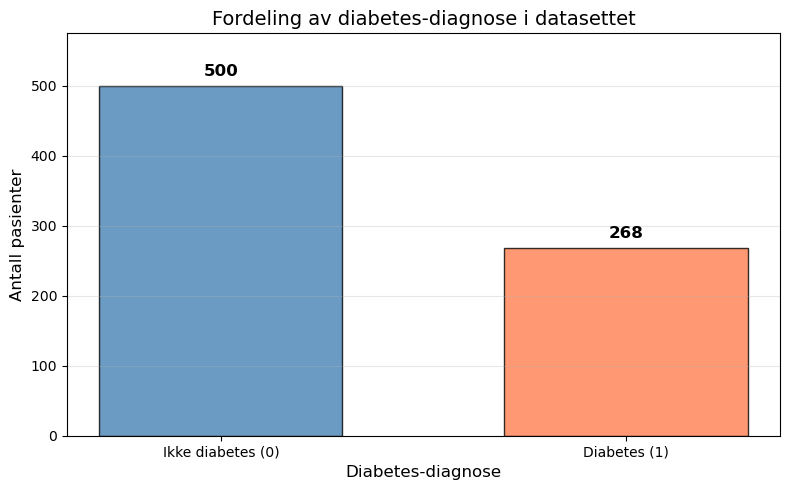


FIGUR 2: Søylediagram av målvariabelen (diabetes)
Tolkning: Datasettet er ubalansert - det er flere pasienter uten
diabetes enn med diabetes. Dette får viktige konsekvenser senere!


In [161]:
# ============================================================================
# HISTOGRAM AV MÅLVARIABELEN
# ============================================================================

fig, ax = plt.subplots(figsize=(8, 5))

# Tell antall i hver klasse og plot som søylediagram
class_counts = diabetes['diabetes'].value_counts().sort_index()
colors = ['steelblue', 'coral']
bars = ax.bar(
    x=[0, 1], 
    height=class_counts.values, 
    color=colors, 
    edgecolor='black', 
    alpha=0.8,
    width=0.6
)

# Legg til antall over hver søyle
for bar, count in zip(bars, class_counts.values):
    ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 10, 
            str(count), ha='center', va='bottom', fontsize=12, fontweight='bold')

ax.set_xlabel('Diabetes-diagnose', fontsize=12)
ax.set_ylabel('Antall pasienter', fontsize=12)
ax.set_title('Fordeling av diabetes-diagnose i datasettet', fontsize=14)
ax.set_xticks([0, 1])
ax.set_xticklabels(['Ikke diabetes (0)', 'Diabetes (1)'])
ax.set_ylim(0, max(class_counts.values) * 1.15)  # Plass til tekst over søylene
ax.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

print("\nFIGUR 2: Søylediagram av målvariabelen (diabetes)")
print("Tolkning: Datasettet er ubalansert - det er flere pasienter uten")
print("diabetes enn med diabetes. Dette får viktige konsekvenser senere!")

### Beskrivelse av egenskapene (features)

Her er en beskrivelse av hver variabel i datasettet (fra [Kaggle](https://www.kaggle.com/uciml/pima-indians-diabetes-database)):

| Variabel | Beskrivelse |
|----------|-------------|
| **Pregnancies** | Antall graviditeter |
| **Glucose** | Plasmaglukosekonsentrasjon etter 2 timer i en oral glukosetoleranse-test |
| **BloodPressure** | Diastolisk blodtrykk (mm Hg) |
| **SkinThickness** | Hudfoldtykkelse på triceps (mm) |
| **Insulin** | 2-timers serum-insulin (μU/ml) |
| **BMI** | Body Mass Index (vekt i kg / (høyde i m)²) |
| **DiabetesPedigreeFunction** | Diabetes slektsfunksjon (genetisk disposisjon) |
| **Age** | Alder (år) |
| **diabetes** | Målvariabel: 0 = ikke diabetes, 1 = diabetes |

### Forbered data for maskinlæring

I maskinlæring kaller vi:
- **X**: Egenskapene (features) – det vi bruker for å gjøre prediksjoner
- **y**: Merkelappene (labels) – det vi ønsker å predikere

Vi ønsker å tilnærme funksjonen som avbilder fra X til y:

$$y \approx f(X; \theta)$$

hvor θ representerer modellens parametere som læres fra data.

In [162]:
# ============================================================================
# SEPARER EGENSKAPER (X) OG MERKELAPPER (y)
# ============================================================================

# X: Alle kolonner unntatt 'diabetes' (egenskapene)
X = diabetes.drop('diabetes', axis=1)

# y: Kun 'diabetes'-kolonnen (merkelappene)
y = diabetes['diabetes']

print(f"✓ Data separert!")
print(f"  X (egenskaper): {X.shape[0]} rader, {X.shape[1]} kolonner")
print(f"  y (merkelapper): {len(y)} verdier")

✓ Data separert!
  X (egenskaper): 768 rader, 8 kolonner
  y (merkelapper): 768 verdier


In [163]:
# Vis de første egenskapene
X.head()

,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [164]:
# Vis de første merkelappene
y.head()

0    1
1    0
2    1
3    0
4    1
Name: diabetes, dtype: int64

---

# Del dataene i trenings- og testsett

## 🎯 Hvorfor dele dataene? Den viktigste innsikten!

Dette er kanskje det **viktigste konseptet** du vil lære i dette kurset:

> ⚠️ **Den gyldne regel i maskinlæring:** Vi må ALLTID evaluere modellen på data den IKKE har sett under trening!

### Problemet: Overfitting (overtilpasning) versus generalisering

Tenk deg en student som pugger tidligere eksamensoppgaver ord for ord, uten å forstå begrepene. På en test med akkurat de samme oppgavene scorer studenten 100%. Men på en ny eksamen med litt annerledes spørsmål, feiler studenten totalt (dvs. læringen/puggingen har ingen generalisering).

En maskinlæringsmodell kan gjøre det samme – den kan "pugge" treningsdataene i stedet for å lære de underliggende mønstrene. Dette kalles **overfitting** og leder som regel til dårlig **generalisering**.

### Testsettet: Vår "eksamen"

Testsettet brukes **kun** til sluttevaluering. Vi må aldri:
- Bruke testdata under trening
- Velge modellparametere basert på testresultater
- "Titte" på testdata under modellutvikling

> 📚 **Analogi:** Testsettet er som en eksamen. Du får ikke se oppgavene på forhånd!

<img src="figurer/trening_test_split.png" width="60%">

**Figur 3: Enkel datasett-oppdeling.** *Vi deler alle tilgjengelige data i et treningssett (lys grå, ~75%) og et testsett (mørk grå, ~25%). <br>Treningssettet brukes til å lære, testsettet simulerer "nye, usette data" og brukes kun til sluttevaluering.*

<details>
<summary>🔍 <b>Python-kode som genererte figuren</b> (klikk for å utvide)</summary>

Figuren er generert med `figurer/generer_figurer.py`. Du kan regenerere den slik:

```python
from figurer.generer_figurer import plot_trening_test_split
fig, ax = plot_trening_test_split(lagre=True)
plt.show()
```

Funksjonen tegner:
- To avrundede bokser: Treningssett (lys grå) og Testsett (mørk grå)
- Proporsjoner: 75% trening, 25% test
- "Alle tilgjengelige data" linje med etiketter

For å se hele koden, åpne filen `figurer/generer_figurer.py`.

</details>

Vi deler tilfeldig av 25% av dataene til testsett:

In [165]:
# ============================================================================
# DEL DATA I TRENINGS- OG TESTSETT
# ============================================================================

from sklearn.model_selection import train_test_split

# Splitt data: 75% trening, 25% test
# random_state sikrer reproduserbare resultater
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.25,      # 25% til test
    random_state=42      # For reproduserbarhet
)

print(f"✓ Data delt opp!")
print(f"  Treningssett: {len(X_train)} observasjoner")
print(f"  Testsett: {len(X_test)} observasjoner")

✓ Data delt opp!
  Treningssett: 576 observasjoner
  Testsett: 192 observasjoner


In [166]:
# Bekreft antall observasjoner
print(f"Treningssett: {len(X_train)}, Testsett: {len(X_test)}")

Treningssett: 576, Testsett: 192


---

# Tren en klassifikasjonsmodell

Nå skal vi trene vår første klassifikasjonsmodell! Vi har mange algoritmer å velge mellom. For nå bruker vi `SGDClassifier` – en lineær klassifikator som optimaliseres med stokastisk gradientnedstigning.

> 💡 **Merk:** Vi bruker modellen som en "svart boks" for nå. Fokuset er på klassifikasjon generelt, ikke på hvordan akkurat denne algoritmen fungerer internt. Les gjerne mer om modellen [her](http://scikit-learn.org/stable/modules/sgd.html) hvis du er nysgjerrig.

<details>
<summary>🔍 <b>For de nysgjerrige: Hvordan fungerer SGDClassifier?</b> (klikk for å utvide)</summary>

### Kort forklaring av SGDClassifier

#### Intuisjonen først – uten matematikk! 🎯

Tenk deg at du skal lære å skille diabetes-pasienter fra friske personer. Du har et stort ark med alle pasientene plottet som prikker, der posisjon avhenger av deres målinger (blodsukker, BMI, alder, osv.). Diabetes-pasienter er røde prikker, friske er blå.

**Hva gjør SGDClassifier?**

1. **Tegn en linje:** Modellen prøver å tegne en rett linje (eller et "plan" i høyere dimensjoner) som separerer de røde fra de blå prikkene så godt som mulig.

2. **Start tilfeldig:** Først tegner den en tilfeldig linje – som sannsynligvis er ganske dårlig.

3. **Lær av feil:** Den plukker tilfeldig én pasient og sjekker: "Havnet denne på riktig side av linjen?"
   - Hvis ja: Flott, gå videre!
   - Hvis nei: Juster linjen litt slik at denne pasienten havner på riktig side.

4. **Gjenta mange ganger:** Ved å gjøre dette tusenvis av ganger med tilfeldige pasienter, blir linjen gradvis bedre og bedre.

> 🏔️ **Analogi:** Tenk deg at du står på et fjell i tett tåke og vil ned til dalen. Du kan ikke se dalen, men du kjenner bakken under føttene. SGD sier: "Ta et lite skritt i retningen der det går nedover." Gjør dette mange ganger, og du ender i dalen – selv uten å kunne se hele landskapet!

**Hvorfor "stokastisk"?** Fordi den plukker tilfeldige ("stokastiske") eksempler i stedet for å se på alle samtidig. Dette gjør den rask, men også litt "hoppende" i sin læring.

---

#### Den matematiske forklaringen 📐

**SGD** står for **Stochastic Gradient Descent** (stokastisk gradientnedstigning). La oss bryte det ned:

#### 1. Lineær klassifikator
SGDClassifier er en *lineær* modell. Den finner et **hyperplan** (en rett linje i 2D, et plan i 3D, etc.) som best mulig separerer de to klassene:

$$\hat{y} = \text{sign}(\mathbf{w}^T \mathbf{x} + b)$$

der:
- $\mathbf{w}$ er en vektor med vekter (én per egenskap)
- $\mathbf{x}$ er datapunktet (egenskapsverdier)
- $b$ er en bias-term (skjæringspunkt)
- $\text{sign}()$ gir +1 eller -1 avhengig av om verdien er positiv eller negativ

#### 2. Tapsfunksjon (Loss function)
Modellen definerer en **tapsfunksjon** som måler hvor dårlig den gjør det. Standard for SGDClassifier er "hinge loss" (som i Support Vector Machines):

$$L(y, \hat{y}) = \max(0, 1 - y \cdot \hat{y})$$

Dette gir 0 tap hvis prediksjonen er korrekt med god margin, og økende tap ellers.

#### 3. Stokastisk gradientnedstigning
I stedet for å beregne gradienten på *alle* data (dyrt!), bruker SGD kun **ett tilfeldig datapunkt om gangen**:

```
For hver epoke (gjennomgang av data):
    For hvert tilfeldig datapunkt (x_i, y_i):
        1. Beregn prediksjon: ŷ = sign(w·x_i + b)
        2. Beregn tap: L = max(0, 1 - y_i·ŷ)
        3. Oppdater vekter: w ← w - η·∇L
```

der $\eta$ er læringsraten (hvor store steg vi tar).

#### Fordeler med SGDClassifier
- ✅ **Skalerer godt:** Håndterer millioner av datapunkter
- ✅ **Rask trening:** Én pass gjennom data kan være nok
- ✅ **Online læring:** Kan oppdateres med nye data uten re-trening
- ✅ **Fleksibel:** Støtter ulike tapsfunksjoner (log loss, hinge, etc.)

#### Ulemper
- ❌ **Sensitiv for skalering:** Fungerer best med normaliserte data
- ❌ **Hyperparametre:** Læringsrate og regularisering må justeres
- ❌ **Kun lineær:** Kan ikke lære komplekse, ikke-lineære mønstre

#### Illustrasjon

```
Klasse 0: ●●●●●●                    Hyperplanet (beslutningsgrensen)
                    \                      ↓
                     \           ──────────────────
                      \         /
Klasse 1:              ○○○○○○○○

SGDClassifier finner den optimale linjen som separerer klassene.
```

> 📚 **Videre lesning:** [scikit-learn SGD dokumentasjon](https://scikit-learn.org/stable/modules/sgd.html)

</details>

In [167]:
# ============================================================================
# IMPORTER OG OPPRETT KLASSIFIKASJONSMODELL
# ============================================================================

from sklearn.linear_model import SGDClassifier

# Opprett en instans av modellen
# random_state sikrer reproduserbare resultater
sgd_clf = SGDClassifier(random_state=20)

print("✓ SGDClassifier opprettet!")

✓ SGDClassifier opprettet!


In [168]:
# ============================================================================
# TREN MODELLEN
# ============================================================================

# fit() trener modellen på treningsdataene
# Dette er der "magien" skjer - modellen lærer mønstre fra data
sgd_clf.fit(X_train, y_train)

print("✓ Modellen er trent på treningsdataene!")

✓ Modellen er trent på treningsdataene!


Med modellen trent kan vi nå lage prediksjoner på testsettet:

In [169]:
# ============================================================================
# LAG PREDIKSJONER PÅ TESTSETTET
# ============================================================================

# predict() gir modellens prediksjon for hver observasjon
y_pred = sgd_clf.predict(X_test)

# Vis de første 20 prediksjonene
print("De første 20 prediksjonene:")
print(y_pred[:20])

De første 20 prediksjonene:
[1 0 0 0 0 1 1 1 1 0 1 1 1 1 0 1 0 1 1 1]


Her er de faktiske svarene for de første 20 observasjonene:

In [170]:
# Vis de faktiske merkelappene
print("De faktiske merkelappene (første 20):")
print(np.array(y_test)[:20])

De faktiske merkelappene (første 20):
[0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0 1 1]


La oss sammenligne prediksjoner med faktiske verdier:

In [171]:
# ============================================================================
# SAMMENLIGN PREDIKSJONER MED FAKTISKE VERDIER
# ============================================================================

print("Sammenligning: (Faktisk, Predikert)")
print("="*50)
results = list(zip(y_test, y_pred))[:20]
for i, (actual, predicted) in enumerate(results, 1):
    status = "✓" if actual == predicted else "✗"
    print(f"  {i:2d}. ({actual}, {predicted}) {status}")

Sammenligning: (Faktisk, Predikert)
   1. (0, 1) ✗
   2. (0, 0) ✓
   3. (0, 0) ✓
   4. (0, 0) ✓
   5. (0, 0) ✓
   6. (0, 1) ✗
   7. (0, 1) ✗
   8. (0, 1) ✗
   9. (0, 1) ✗
  10. (0, 0) ✓
  11. (1, 1) ✓
  12. (0, 1) ✗
  13. (1, 1) ✓
  14. (0, 1) ✗
  15. (0, 0) ✓
  16. (1, 1) ✓
  17. (0, 0) ✓
  18. (0, 1) ✗
  19. (1, 1) ✓
  20. (1, 1) ✓


Vi ser at modellen treffer noen ganger, og bommer andre ganger.

> 🤔 **Men hvor god er egentlig modellen?** Vi trenger måter å evaluere og validere modeller på...

---

# Evaluering av modeller: Ytelsesmål

Før vi dykker inn i metrikker og metoder, er det viktig å spørre: "Hva er sluttmålet for systemet vårt?"

Ulike kontekster krever ulike avveininger:
- Noen ganger ofrer vi nøyaktighet for hastighet
- I medisinske sammenhenger kan visse typer feil være mer alvorlige enn andre

For nå fokuserer vi på de grunnleggende evalueringsmetodene.

## Nøyaktighet (Accuracy) og ulike typer feil

**Nøyaktighet** (accuracy) er andelen korrekte prediksjoner – ofte det første målet vi ser på.

Men i binær klassifikasjon finnes det ulike typer feil:

| Type | Forkortelse | Betydning |
|------|-------------|-----------|
| **Sann positiv** | TP | Korrekt identifisert som positiv (syk) |
| **Falsk positiv** | FP | Feilaktig klassifisert som positiv (frisk, men diagnostisert som syk) |
| **Sann negativ** | TN | Korrekt identifisert som negativ (frisk) |
| **Falsk negativ** | FN | Feilaktig klassifisert som negativ (syk, men ikke oppdaget) |

> ⚠️ **Viktig for medisin:** I medisinsk diagnostikk kan disse feiltypene ha svært ulike konsekvenser!
> - **Falsk negativ** (FN): En syk pasient får ikke behandling → potensielt farlig
> - **Falsk positiv** (FP): En frisk pasient får unødvendig behandling → ressursbruk og angst

Vi kan beregne nøyaktigheten med `accuracy_score` fra scikit-learn:

In [172]:
# ============================================================================
# BEREGN NØYAKTIGHET
# ============================================================================

from sklearn.metrics import accuracy_score

# Beregn nøyaktigheten: andel korrekte prediksjoner
accuracy = accuracy_score(y_test, y_pred)

print(f"Nøyaktighet på testsettet: {accuracy:.1%}")
print(f"  ({accuracy*100:.1f}% av prediksjonene er korrekte)")

Nøyaktighet på testsettet: 54.2%
  (54.2% av prediksjonene er korrekte)


Modellen predikerer korrekt omtrent 54% av tiden. Er dette bra?

La oss undersøke dette nærmere...

## Valideringssett og modellvalg

**Modellvalg** er prosessen med å velge den beste modellen og justere dens parametere.

> ⚠️ **Kritisk:** Vi må unngå å bruke testsettet under modellvalg! Ellers "lekker" informasjon, og vi får et skjevt estimat av generaliseringsytelsen.

I stedet deler vi treningsdataene i:
1. **Treningssett** (nytt, mindre): For å trene modellen
2. **Valideringssett**: For å evaluere underveis i modellutvikling

<img src="figurer/datasett_oppdeling.png" width="70%">

**Figur 4: Oppdeling av datasett i trenings-, validerings- og testsett.** *Datasettet 𝒟 deles først i et treningssett (hvit) og et testsett (mørk rosa). <br>Treningssettet deles videre i et mindre treningssett og et valideringssett (lys rosa) for modellvalg og hyperparameter-tuning. <br>Testsettet holdes helt adskilt og brukes kun til sluttevaluering.*

<details>
<summary>🔍 <b>Python-kode som genererte figuren</b> (klikk for å utvide)</summary>

Figuren er generert med `figurer/generer_figurer.py`. Du kan regenerere den slik:

```python
from figurer.generer_figurer import plot_datasett_oppdeling
fig, ax = plot_datasett_oppdeling(lagre=True)
plt.show()
```

For å se hele koden, åpne filen `figurer/generer_figurer.py`.

</details>

### Din tur! 🎯

- Del `(X_train, y_train)` i to deler: ett nytt treningssett og ett valideringssett. Du kan kalle dem `X_train_new, X_val, y_train_new, y_val`. *Hint:* Bruk `train_test_split`-funksjonen.
- Tren modellen på det nye treningssettet
- Beregn nøyaktigheten på valideringssettet med `model.score(X_val, y_val)`
- Er resultatet bra? Hvilken nøyaktighet ville en tilfeldig klassifikator oppnådd?
- Eksperimenter med parametere i `SGDClassifier` for å forbedre resultatet

<details>
<summary>Klikk <font color="red"><b>her</b></font> for en løsning</summary>

```python
from sklearn.model_selection import train_test_split

# Del treningsdata i nytt treningssett og valideringssett
X_train_new, X_val, y_train_new, y_val = train_test_split(X_train, y_train)

# Tren modellen på det nye treningssettet
model = SGDClassifier(random_state=20)
model.fit(X_train_new, y_train_new)

# Evaluer på valideringssettet
print(f"Nøyaktighet på valideringssett: {model.score(X_val, y_val):.1%}")
```

</details>

---

## Kryssvalidering (Cross-validation)

En annen mye brukt valideringsmetode er **kryssvalidering**.

### Ideen bak kryssvalidering

1. Del treningssettet tilfeldig i K deler, kalt **folder** (folds)
2. Tren modellen K ganger, hver gang med én fold som valideringssett og de resterende K-1 som treningssett
3. Bruk gjennomsnittet av de K scorene som ytelsesestimat

<img src="figurer/kfold_kuler.png" width="85%">

**Figur 5: K-fold kryssvalidering med k=4.** *Hver rad viser én iterasjon. De fargede kulene representerer individuelle datapunkter. I hver iterasjon brukes én fold (markert med ramme) som testdata, mens resten brukes til trening. Etter k iterasjoner har hvert datapunkt vært brukt som testdata nøyaktig én gang.*

<details>
<summary>🔍 <b>Python-kode som genererte figuren</b> (klikk for å utvide)</summary>

Figuren er generert med `figurer/generer_figurer.py`. Du kan regenerere den slik:

```python
from figurer.generer_figurer import plot_kfold_kryssvalidering_kuler
fig, ax = plot_kfold_kryssvalidering_kuler(k=4, n_datapunkter=20, lagre=True)
plt.show()
```

Funksjonen tegner:
- Fargede kuler (rød/teal) som representerer datapunkter
- 3D-effekt på kulene med lysrefleks og skygge
- Ramme rundt testfolden som flytter seg for hver iterasjon
- Tekstbokser og piler med norske etiketter

For å se hele koden, åpne filen `figurer/generer_figurer.py`.

</details>

### Fordeler med kryssvalidering

1. **Utnytter data bedre**: Hvert datapunkt brukes både til trening og validering
2. **Mer robust estimat**: Mindre avhengig av en spesiell tilfeldig oppdeling
3. **Reduserer varians**: Gjennomsnittet av K målinger er mer stabilt

> 📚 **Spesialtilfelle:** Når K = antall datapunkter, kalles det "leave-one-out" kryssvalidering.

In [173]:
# ============================================================================
# 5-FOLD KRYSSVALIDERING
# ============================================================================

from sklearn.model_selection import cross_val_score

# Utfør 5-fold kryssvalidering
# cv=5: Del i 5 folder
# scoring='accuracy': Bruk nøyaktighet som mål
# n_jobs=-1: Bruk alle tilgjengelige CPU-kjerner
cv_scores = cross_val_score(
    sgd_clf, 
    X_train, 
    y_train, 
    cv=5, 
    scoring='accuracy', 
    n_jobs=-1
)

print("Kryssvalidering resultater:")
print("="*50)
print(f"  Scorer for hver fold: {cv_scores}")
print(f"  Gjennomsnittlig nøyaktighet: {cv_scores.mean():.1%}")
print(f"  Standardavvik: {cv_scores.std():.3f}")

Kryssvalidering resultater:
  Scorer for hver fold: [0.62068966 0.55652174 0.34782609 0.65217391 0.68695652]
  Gjennomsnittlig nøyaktighet: 57.3%
  Standardavvik: 0.120


### Er 57% nøyaktighet bra?

Gjennomsnitts-nøyaktigheten på omtrent 57% høres kanskje greit ut. Men la oss sjekke:

Husk at det var **flere ikke-diabetes enn diabetes** i datasettet!

In [174]:
# ============================================================================
# SJEKK KLASSEFORDELINGEN
# ============================================================================

# Tell antall i hver klasse
class_counts = diabetes['diabetes'].value_counts()
print("Klassefordeling i datasettet:")
print(class_counts)
print(f"\nAndel ikke-diabetes: {class_counts[0]/len(diabetes):.1%}")
print(f"Andel diabetes: {class_counts[1]/len(diabetes):.1%}")

Klassefordeling i datasettet:
diabetes
0    500
1    268
Name: count, dtype: int64

Andel ikke-diabetes: 65.1%
Andel diabetes: 34.9%


Hva om vi bare gjetter at **alle** tilhører majoritetsklassen (ikke-diabetes)?

In [175]:
# ============================================================================
# SAMMENLIGN MED NAIV BASELINE
# ============================================================================

# Lag en "prediksjon" der vi alltid sier 0 (ikke-diabetes)
y_dummy = [0] * len(y_test)  # Liste med bare 0-ere

# Beregn nøyaktigheten
dummy_accuracy = accuracy_score(y_test, y_dummy)
print(f"Nøyaktighet ved å alltid gjette 'ikke-diabetes': {dummy_accuracy:.1%}")
print(f"\nVår modell oppnådde: {accuracy_score(y_test, y_pred):.1%}")
print(f"Forskjell: {accuracy_score(y_test, y_pred) - dummy_accuracy:.1%}")

Nøyaktighet ved å alltid gjette 'ikke-diabetes': 64.1%

Vår modell oppnådde: 54.2%
Forskjell: -9.9%


### ⚠️ Fellen med ubalanserte datasett

Dette illustrerer et **kritisk poeng**: I datasett der én klasse dominerer, kan en naiv klassifikator som alltid velger majoritetsklassen oppnå høy nøyaktighet!

> 📚 **Leksjon:** Nøyaktighet alene er ofte misvisende. Vi trenger andre metrikker for å forstå modellens faktiske ytelse.

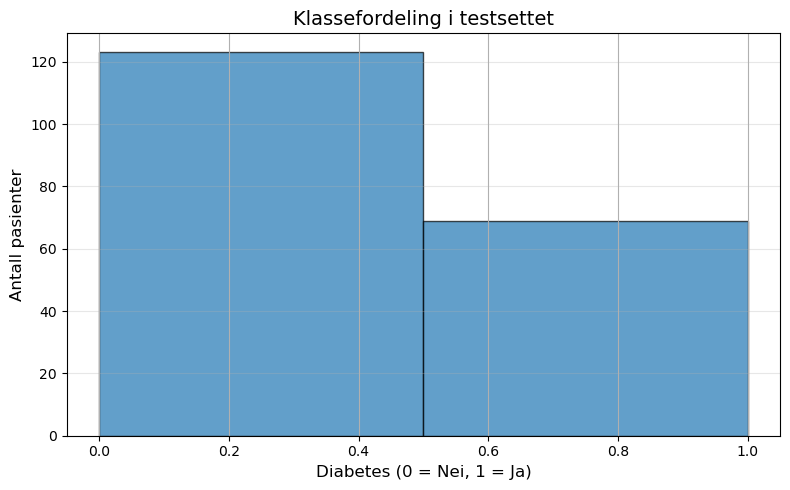


FIGUR 6: Klassefordeling i testsettet
Tolkning: Testsettet har også ubalansert klassefordeling.
Dette gjør nøyaktighet til et problematisk mål!


In [176]:
# ============================================================================
# VIS KLASSEFORDELING I TESTSETTET
# ============================================================================

fig, ax = plt.subplots(figsize=(8, 5))
y_test.hist(bins=2, ax=ax, edgecolor='black', alpha=0.7)
ax.set_xlabel('Diabetes (0 = Nei, 1 = Ja)', fontsize=12)
ax.set_ylabel('Antall pasienter', fontsize=12)
ax.set_title('Klassefordeling i testsettet', fontsize=14)
ax.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

print("\nFIGUR 6: Klassefordeling i testsettet")
print("Tolkning: Testsettet har også ubalansert klassefordeling.")
print("Dette gjør nøyaktighet til et problematisk mål!")

### Din tur! 🎯

Mange maskinlæringsmodeller, inkludert `SGDClassifier`, fungerer bedre når inndata er **skalert**.

Prøv å bruke `StandardScaler` fra scikit-learn til å standardisere treningsdataene. Kjør deretter `cross_val_score` på de skalerte dataene.

```python
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Hint: Opprett en scaler, bruk fit_transform på treningsdata
# og transform på testdata
```

---

## Forvirringsmatrise (Confusion Matrix)

En **forvirringsmatrise** oppsummerer resultatene fra en klassifikasjonsmodell. Den viser på hvilke måter klassifikatoren er "forvirret" – hvilke feil den gjør.

Matrisen teller hvor mange ganger:
- Diabetes-tilfeller korrekt identifiseres som diabetes
- Ikke-diabetes korrekt identifiseres som ikke-diabetes
- Diabetes feilaktig klassifiseres som ikke-diabetes
- Ikke-diabetes feilaktig klassifiseres som diabetes

In [177]:
# ============================================================================
# GENERER PREDIKSJONER MED KRYSSVALIDERING
# ============================================================================

from sklearn.model_selection import cross_val_predict

# cross_val_predict returnerer prediksjoner for alle data
# basert på kryssvalidering (hver prediksjon er gjort
# når observasjonen var i valideringsfolden)
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train, cv=5, n_jobs=-1)

print(f"✓ Generert {len(y_train_pred)} prediksjoner")

✓ Generert 576 prediksjoner


In [178]:
# Vis de første prediksjonene
print("De første 20 prediksjonene:")
print(y_train_pred[:20])

De første 20 prediksjonene:
[1 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 1 0]


In [179]:
# Vis de faktiske verdiene
print("De faktiske verdiene (første 20):")
print(np.array(y_train)[:20])

De faktiske verdiene (første 20):
[1 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 1 1 0 0]


In [180]:
# ============================================================================
# BEREGN FORVIRRINGSMATRISEN
# ============================================================================

from sklearn.metrics import confusion_matrix

# Beregn forvirringsmatrisen
cm = confusion_matrix(y_train, y_train_pred)

print("Forvirringsmatrise:")
print(cm)
print("\nTolkning:")
print(f"  Rad 1: Faktisk ikke-diabetes (klasse 0)")
print(f"  Rad 2: Faktisk diabetes (klasse 1)")
print(f"  Kolonne 1: Predikert som ikke-diabetes")
print(f"  Kolonne 2: Predikert som diabetes")

Forvirringsmatrise:
[[226 151]
 [ 95 104]]

Tolkning:
  Rad 1: Faktisk ikke-diabetes (klasse 0)
  Rad 2: Faktisk diabetes (klasse 1)
  Kolonne 1: Predikert som ikke-diabetes
  Kolonne 2: Predikert som diabetes


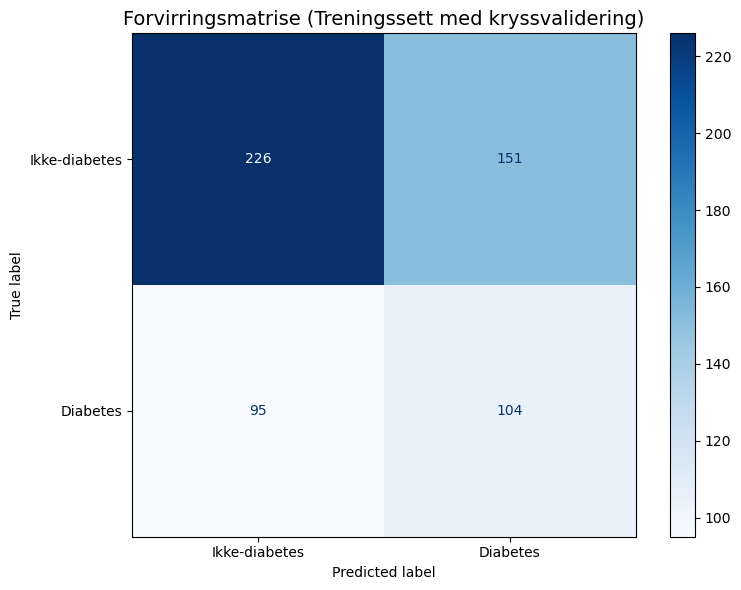


FIGUR 7: Forvirringsmatrise
Tolkning: Fargeintensiteten viser antall observasjoner i hver kategori.
Ideelt sett ønsker vi store tall på diagonalen (korrekte prediksjoner)
og små tall utenfor diagonalen (feil).


In [181]:
# ============================================================================
# VISUALISER FORVIRRINGSMATRISEN
# ============================================================================

from sklearn.metrics import ConfusionMatrixDisplay

fig, ax = plt.subplots(figsize=(8, 6))
ConfusionMatrixDisplay.from_predictions(
    y_train, 
    y_train_pred, 
    display_labels=['Ikke-diabetes', 'Diabetes'],
    cmap='Blues',
    ax=ax
)
ax.set_title('Forvirringsmatrise (Treningssett med kryssvalidering)', fontsize=14)
plt.tight_layout()
plt.show()

print("\nFIGUR 7: Forvirringsmatrise")
print("Tolkning: Fargeintensiteten viser antall observasjoner i hver kategori.")
print("Ideelt sett ønsker vi store tall på diagonalen (korrekte prediksjoner)")
print("og små tall utenfor diagonalen (feil).")

### Tolkning av forvirringsmatrisen

Hver rad representerer en **faktisk klasse**, hver kolonne en **predikert klasse**:

| | Predikert: Ikke-diabetes | Predikert: Diabetes |
|---|---|---|
| **Faktisk: Ikke-diabetes** | Sann negativ (TN) | Falsk positiv (FP) |
| **Faktisk: Diabetes** | Falsk negativ (FN) | Sann positiv (TP) |

Fra vår matrise ser vi:
- **Sanne negative (TN)**: Korrekt klassifisert som ikke-diabetes
- **Falske positive (FP)**: Feilaktig klassifisert som diabetes (var egentlig frisk)
- **Falske negative (FN)**: Feilaktig klassifisert som ikke-diabetes (var egentlig syk)
- **Sanne positive (TP)**: Korrekt klassifisert som diabetes

> 🤔 **Refleksjon:** Hvordan ville forvirringsmatrisen sett ut for en *perfekt* klassifikator?

---

## Presisjon, Recall og Spesifisitet

For binære klassifikasjonsproblemer er tre viktige metrikker **presisjon**, **recall** (sensitivitet) og **spesifisitet**.

### Notasjon

| Symbol | Betydning |
|--------|-----------|
| P | Alle faktisk positive datapunkter |
| N | Alle faktisk negative datapunkter |
| TP | Sanne positive (korrekt identifiserte positive) |
| FP | Falske positive (negative feilaktig identifisert som positive) |
| TN | Sanne negative (korrekt identifiserte negative) |
| FN | Falske negative (positive feilaktig identifisert som negative) |

### Presisjon (Precision)

**Presisjon** er andelen av de positive prediksjonene som faktisk var korrekte.

$$\text{Presisjon} = \frac{\text{Sanne positive}}{\text{Alle positive prediksjoner}} = \frac{TP}{TP + FP}$$

> 📚 **Intuisjon:** "Når modellen sier 'diabetes', hvor ofte har den rett?"

> 🏥 **Medisinsk relevans:** Høy presisjon betyr færre falske alarmer – færre friske pasienter får unødvendig diagnose.

### Recall / Sensitivitet (Sensitivity)

**Recall** (også kalt sensitivitet) er andelen av de faktisk positive som ble korrekt identifisert.

$$\text{Recall} = \frac{\text{Sanne positive}}{\text{Alle faktisk positive}} = \frac{TP}{TP + FN}$$

> 📚 **Intuisjon:** "Av alle som faktisk har diabetes, hvor mange fanger modellen opp?"

> 🏥 **Medisinsk relevans:** Høy recall betyr at vi fanger opp de fleste syke pasienter – viktig for alvorlige sykdommer der vi ikke vil "misse" noen.

### Spesifisitet (Specificity)

**Spesifisitet** er andelen av de faktisk negative som ble korrekt identifisert.

$$\text{Spesifisitet} = \frac{\text{Sanne negative}}{\text{Alle faktisk negative}} = \frac{TN}{TN + FP}$$

> 📚 **Intuisjon:** "Av alle som faktisk er friske, hvor mange identifiserer modellen korrekt som friske?"

> 🏥 **Medisinsk relevans:** Høy spesifisitet betyr færre friske som får feilaktig diagnose.

<img src="figurer/sensitivitet_spesifisitet.png" width="55%">

**Figur 8: Illustrasjon av sensitivitet og spesifisitet.** *Diagrammet viser sammenhengen mellom relevante elementer (faktisk positive, grønn bakgrunn), utvalgte elementer (predikert positive, oval), og de fire utfallene: sanne positive (TP), falske positive (FP), falske negative (FN), og sanne negative (TN). Fylte prikker representerer faktisk syke, tomme prikker representerer faktisk friske. Sensitivitet måler hvor mange syke som fanges opp, spesifisitet måler hvor mange friske som korrekt identifiseres.*

<details>
<summary>🔍 <b>Python-kode som genererte figuren</b> (klikk for å utvide)</summary>

Figuren er generert med `figurer/generer_figurer.py`. Du kan regenerere den slik:

```python
from figurer.generer_figurer import plot_sensitivitet_spesifisitet
fig, ax = plot_sensitivitet_spesifisitet(lagre=True)
plt.show()
```

Funksjonen tegner:
- To halvdeler: grønn (faktisk positive) og grå (faktisk negative)
- Oval som representerer predikerte positive (utvalgte elementer)
- Fire regioner: TP, FP, FN, TN med fargekoding
- Fylte prikker (syke) og tomme prikker (friske) som datapunkter
- Forklaringer og formler for sensitivitet og spesifisitet

For å se hele koden, åpne filen `figurer/generer_figurer.py`.

</details>

### Kobling til forvirringsmatrisen

Forvirringsmatrisen gir oss verdiene TP, FP, FN og TN som vi trenger for å beregne metrikkene:

In [182]:
# ============================================================================
# BEREGN METRIKKER FRA FORVIRRINGSMATRISEN
# ============================================================================

# Hent verdier fra forvirringsmatrisen
# ravel() "flater ut" matrisen til en 1D-array
tn, fp, fn, tp = cm.ravel()

print("Verdier fra forvirringsmatrisen:")
print(f"  Sanne negative (TN): {tn}")
print(f"  Falske positive (FP): {fp}")
print(f"  Falske negative (FN): {fn}")
print(f"  Sanne positive (TP): {tp}")

Verdier fra forvirringsmatrisen:
  Sanne negative (TN): 226
  Falske positive (FP): 151
  Falske negative (FN): 95
  Sanne positive (TP): 104


In [183]:
# ============================================================================
# BEREGN PRESISJON, RECALL OG SPESIFISITET
# ============================================================================

# Presisjon: Andel korrekte blant de predikerte positive
presisjon = tp / (tp + fp)

# Recall: Andel oppdagede blant de faktisk positive
recall = tp / (tp + fn)

# Spesifisitet: Andel korrekte blant de faktisk negative
spesifisitet = tn / (tn + fp)

print("Beregnede metrikker:")
print("="*50)
print(f"  Presisjon:    {presisjon:.3f} ({presisjon:.1%})")
print(f"  Recall:       {recall:.3f} ({recall:.1%})")
print(f"  Spesifisitet: {spesifisitet:.3f} ({spesifisitet:.1%})")

Beregnede metrikker:
  Presisjon:    0.408 (40.8%)
  Recall:       0.523 (52.3%)
  Spesifisitet: 0.599 (59.9%)


Scikit-learn har innebygde funksjoner for disse beregningene:

In [184]:
# ============================================================================
# BRUK SCIKIT-LEARN FUNKSJONER
# ============================================================================

from sklearn.metrics import precision_score, recall_score

# Beregn med scikit-learn
print("Metrikker fra scikit-learn:")
print(f"  Presisjon: {precision_score(y_train, y_train_pred):.3f}")
print(f"  Recall:    {recall_score(y_train, y_train_pred):.3f}")

Metrikker fra scikit-learn:
  Presisjon: 0.408
  Recall:    0.523


### Din tur! 🎯

> 🤔 **Refleksjon:** Hva er viktigst – høy presisjon eller høy recall? 

Tenk på ulike medisinske scenarioer:
1. Screening for en sjelden, men dødelig sykdom
2. Test for en mild tilstand der behandlingen har bivirkninger
3. Diagnostisering av en smittsom sykdom

Hvilket mål ville du prioritert i hvert tilfelle, og hvorfor?

---

## F₁-score

Siden vi ofte bryr oss om både presisjon og recall, kan det være nyttig å kombinere dem til én metrikk.

**F₁-scoren** er det harmoniske gjennomsnittet av presisjon og recall:

$$F_1 = \frac{2}{\frac{1}{\text{presisjon}} + \frac{1}{\text{recall}}} = 2 \cdot \frac{\text{presisjon} \cdot \text{recall}}{\text{presisjon} + \text{recall}}$$

### Hvorfor harmonisk gjennomsnitt?

Det harmoniske gjennomsnittet gir lav score hvis enten presisjon eller recall er lav. Dette straffer klassifikatorer som "jukser" ved å fokusere på kun én av metrikkene.

> 📚 **Eksempel:** Hvis presisjon = 0.0001 og recall = 1.0:
> - Aritmetisk gjennomsnitt: (0.0001 + 1) / 2 ≈ 0.5 (høres bra ut!)
> - F₁-score: ≈ 0.0002 (avslører det dårlige resultatet)

En F₁-score på 1.0 betyr perfekt presisjon **og** perfekt recall.

In [185]:
# ============================================================================
# BEREGN F1-SCORE
# ============================================================================

from sklearn.metrics import f1_score

f1 = f1_score(y_train, y_train_pred)

print(f"F₁-score: {f1:.3f}")
print(f"\nTolkning: En F₁-score på {f1:.2f} indikerer moderat ytelse.")
print("En perfekt klassifikator ville hatt F₁ = 1.0")

F₁-score: 0.458

Tolkning: En F₁-score på 0.46 indikerer moderat ytelse.
En perfekt klassifikator ville hatt F₁ = 1.0


### Din tur! 🎯

To klassifikatorer A og B har følgende verdier:

$$
\begin{align}
\text{presisjon}_A = 0.7,\quad &\text{recall}_A = 0.6 \\
\text{presisjon}_B = 0.3,\quad &\text{recall}_B = 1.0
\end{align}
$$

1. Beregn det aritmetiske gjennomsnittet for begge modeller
2. Beregn F₁-scoren for begge modeller
3. Hvilken modell er best ifølge F₁?

### Din tur! 🎯

Husk at jeg ba deg prøve å normalisere data med `StandardScaler`? Hvis du ikke har gjort det ennå, prøv nå! Kjør deretter prediksjonene gjennom evalueringsmetodene ovenfor.

Her er en løsning. Ikke kikk før du har prøvd selv! 😊

In [186]:
# ============================================================================
# LØSNING: NORMALISERING OG EVALUERING
# ============================================================================

if (colab or kaggle):
    import urllib.request
    from urllib.error import HTTPError

    # Last ned løsningsskriptet
    url = 'https://raw.githubusercontent.com/MMIV-ML/ELMED219-2025/master/Lab0-ML/notebooks/solutions/1.3-1-sgd_normalized.py'
    filename = '1.3-1-sgd_normalized.py'

    try:
        urllib.request.urlretrieve(url, filename)
        print(f"✓ Lastet ned {filename}")
    except HTTPError as e:
        print(f"✗ Kunne ikke laste ned {filename}: {e}")

    # Last skriptet
    filepath = os.path.join(os.getcwd(), filename)
    %load {filepath}

In [187]:
# %load /Users/arvid/GitHub/ELMED219-2026/Lab0-ML/notebooks/solutions/1.3-1-sgd_normalized.py
from sklearn.preprocessing import StandardScaler

# Create an instance of the StandardScaler
scaler = StandardScaler()

# Fit and transform the training and test data using the scaler
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create and train an SGDClassifier
sgd_clf_scaled = SGDClassifier(random_state=20)
sgd_clf_scaled.fit(X_train_scaled, y_train)

# Compute the cross-validation predictions on the scaled training set
y_train_pred = cross_val_predict(sgd_clf, X_train_scaled, y_train, cv=5)

# Print the accuracy, confusion matrix, and F1 score
print("Cross-validation results on the scaled training set:")
print(f"Accuracy: {accuracy_score(y_train, y_train_pred)}")
print(f"Confusion matrix:\n{confusion_matrix(y_train, y_train_pred)}")
print(f"F1 score: {f1_score(y_train, y_train_pred)}")


Cross-validation results on the scaled training set:
Accuracy: 0.6996527777777778
Confusion matrix:
[[287  90]
 [ 83 116]]
F1 score: 0.5728395061728395


In [188]:
# ============================================================================
# NORMALISERING MED STANDARDSCALER
# ============================================================================

from sklearn.preprocessing import StandardScaler

# Opprett en StandardScaler
scaler = StandardScaler()

# Fit på treningsdata og transformer
# fit_transform lærer parameterne (gjennomsnitt, standardavvik) og transformerer
X_train_scaled = scaler.fit_transform(X_train)

# Bruk kun transform på testdata (for å unngå datalekkasje!)
X_test_scaled = scaler.transform(X_test)

# Tren en ny SGDClassifier på skalerte data
sgd_clf_scaled = SGDClassifier(random_state=20)
sgd_clf_scaled.fit(X_train_scaled, y_train)

# Evaluer med kryssvalidering
y_train_pred = cross_val_predict(sgd_clf, X_train_scaled, y_train, cv=5)

# Print resultater
print("Kryssvalidering på skalerte data:")
print("="*50)
print(f"  Nøyaktighet: {accuracy_score(y_train, y_train_pred):.1%}")
print(f"  Forvirringsmatrise:")
print(confusion_matrix(y_train, y_train_pred))
print(f"  F₁-score: {f1_score(y_train, y_train_pred):.3f}")

Kryssvalidering på skalerte data:
  Nøyaktighet: 70.0%
  Forvirringsmatrise:
[[287  90]
 [ 83 116]]
  F₁-score: 0.573


Vi bruker den normaliserte klassifikatoren videre:

In [189]:
# ============================================================================
# OPPDATER VARIABLER TIL SKALERTE VERSJONER
# ============================================================================

sgd_clf = sgd_clf_scaled
X_train = X_train_scaled
X_test = X_test_scaled

print("✓ Oppdatert til skalerte data og modell")

✓ Oppdatert til skalerte data og modell


---

## Presisjon/Recall-avveiningen

Det er typisk utfordrende å oppnå både høy presisjon og høy recall samtidig. Å forbedre den ene kan forverrekke den andre. Denne avveiningen skyldes **terskelen** som brukes for å ta beslutninger i klassifiseringen.

### Hvorfor eksisterer denne avveiningen?

En klassifikator med perfekt recall er enkel å lage: bare prediker at **alt** er positivt! Da er det ingen falske negative, og recall = 1.0. Men presisjonen vil være elendig.

For høy presisjon, gjør motsatt: prediker positivt kun når du er **ekstremt sikker**. Da blir det få falske positive, men mange falske negative, så recall blir dårlig.

### Hva skjer "bak kulissene"?

Når vi trener `SGDClassifier`, finner den et **hyperplan** (en grense) i datarommet som separerer klassene best mulig.

For hvert datapunkt beregner modellen **avstanden** til dette hyperplanet:
- **Negativ avstand** → predikert som negativ klasse
- **Positiv avstand** → predikert som positiv klasse

Standardterskelen er 0, men vi kan endre denne!

> 💡 **Nøkkelinnsikt:** Hvor du setter terskelen har stor betydning for presisjon og recall!

La oss eksperimentere med et eksempel fra testsettet:

In [190]:
# ============================================================================
# UNDERSØK ET EKSEMPEL
# ============================================================================

# Hent første testpunkt
eksempel_features = X_test[0]
eksempel_faktisk = y_test.iloc[0]

print(f"Eksempel-datapunkt (første i testsettet):")
print(f"  Faktisk klasse: {eksempel_faktisk} ({'Diabetes' if eksempel_faktisk == 1 else 'Ikke-diabetes'})")

Eksempel-datapunkt (første i testsettet):
  Faktisk klasse: 0 (Ikke-diabetes)


In [191]:
# ============================================================================
# BEREGN AVSTAND TIL BESLUTNINGSGRENSEN
# ============================================================================

# decision_function gir avstanden til hyperplanet
avstand = sgd_clf.decision_function([eksempel_features])

print(f"Avstand til beslutningsgrensen: {avstand[0]:.3f}")
print(f"\nTolkning: Negativ avstand betyr at modellen heller mot 'ikke-diabetes'")

Avstand til beslutningsgrensen: -1.757

Tolkning: Negativ avstand betyr at modellen heller mot 'ikke-diabetes'


In [192]:
# ============================================================================
# EKSPERIMENTER MED TERSKEL
# ============================================================================

print("Eksperiment med ulike terskler:")
print("="*50)

for terskel in [0, -1, -2, -10]:
    prediksjon = avstand > terskel
    print(f"  Terskel = {terskel:3d}: Predikert diabetes? {prediksjon[0]}")

Eksperiment med ulike terskler:
  Terskel =   0: Predikert diabetes? False
  Terskel =  -1: Predikert diabetes? False
  Terskel =  -2: Predikert diabetes? True
  Terskel = -10: Predikert diabetes? True


Du ser at ved å **øke terskelen** for å klassifisere noe som diabetes, blir modellen mer "konservativ" – færre predikeres som positive.

- **Høyere terskel** → Høyere presisjon, lavere recall
- **Lavere terskel** → Lavere presisjon, høyere recall

In [193]:
# ============================================================================
# BEREGN BESLUTNINGSSCORER FOR ALLE TRENINGSDATA
# ============================================================================

# Hent beslutningsscorer for alle treningspunkter med kryssvalidering
y_scores = cross_val_predict(
    sgd_clf, 
    X_train, 
    y_train, 
    cv=2, 
    method='decision_function'
)

print(f"✓ Beregnet {len(y_scores)} beslutningsscorer")
print(f"  Min score: {y_scores.min():.3f}")
print(f"  Max score: {y_scores.max():.3f}")

✓ Beregnet 576 beslutningsscorer
  Min score: -23.103
  Max score: 25.952


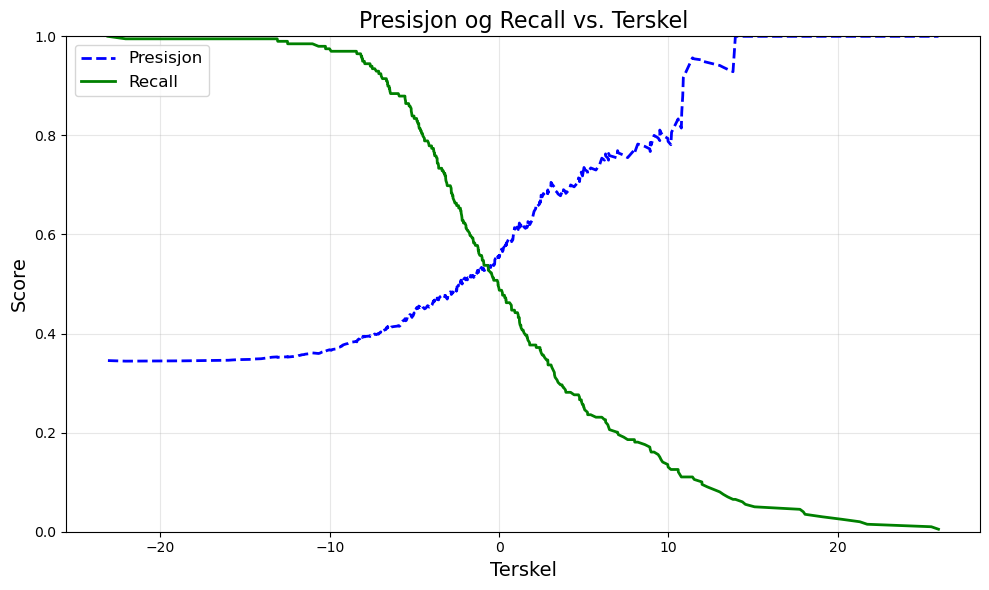


FIGUR 9: Presisjon og Recall som funksjon av terskel
Tolkning: Når terskelen øker, øker presisjonen (blå stiplet linje)
mens recall synker (grønn linje). Dette er presisjon/recall-avveiningen.


In [194]:
# ============================================================================
# PLOT PRESISJON/RECALL VS TERSKEL
# ============================================================================

from sklearn.metrics import precision_recall_curve

# Beregn presisjon og recall for ulike terskelverdier
presisjoner, recalls, terskler = precision_recall_curve(y_train, y_scores)

# Plot
fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(terskler, presisjoner[:-1], "b--", label="Presisjon", linewidth=2)
ax.plot(terskler, recalls[:-1], "g-", label="Recall", linewidth=2)

ax.set_xlabel("Terskel", fontsize=14)
ax.set_ylabel("Score", fontsize=14)
ax.set_title("Presisjon og Recall vs. Terskel", fontsize=16)
ax.legend(loc="upper left", fontsize=12)
ax.set_ylim([0, 1])
ax.grid(alpha=0.3)

plt.tight_layout()
plt.show()

print("\nFIGUR 9: Presisjon og Recall som funksjon av terskel")
print("Tolkning: Når terskelen øker, øker presisjonen (blå stiplet linje)")
print("mens recall synker (grønn linje). Dette er presisjon/recall-avveiningen.")

### Velge terskel basert på problemet

Hvor du setter terskelen avhenger av det spesifikke problemet:

- **Spam-filter:** Høy presisjon viktig (vi vil ikke miste viktige e-poster)
- **Kreftscreening:** Høy recall viktig (vi vil ikke misse noen tilfeller)

> 💡 **Viktig:** Det er enkelt å oppnå hvilken som helst presisjon du ønsker – bare velg riktig terskel. Men da må du også akseptere den tilhørende recall-verdien!

In [195]:
# ============================================================================
# EKSEMPEL: OPPNÅ HØY PRESISJON
# ============================================================================

# Velg en høy terskel for høy presisjon
høy_terskel = 18
y_pred_presis = (y_scores > høy_terskel)

presisjon_høy = precision_score(y_train, y_pred_presis)
recall_høy = recall_score(y_train, y_pred_presis)

print(f"Med terskel = {høy_terskel}:")
print(f"  Presisjon: {presisjon_høy:.1%}")
print(f"  Recall:    {recall_høy:.1%}")
print(f"\nVi oppnår høy presisjon, men recall er svært lav!")

Med terskel = 18:
  Presisjon: 100.0%
  Recall:    3.5%

Vi oppnår høy presisjon, men recall er svært lav!


> 📚 "Hvis noen sier 'la oss oppnå 90% presisjon!', bør du spørre: 'med hvilken recall?'" 
> — Aurélien Géron

In [196]:
# ============================================================================
# F1-SCORE VS TERSKEL (INTERAKTIV)
# ============================================================================

from ipywidgets import interact

@interact(terskel=(-20, 20, 1))
def vis_f1_score(terskel=0):
    """Viser F1-score for ulike terskelverdier"""
    f1_over = f1_score(y_train, (y_scores > terskel))
    f1_under = f1_score(y_train, (y_scores < terskel))
    print(f"Terskel: {terskel}")
    print(f"  F₁ (y_scores > terskel): {f1_over:.3f}")
    print(f"  F₁ (y_scores < terskel): {f1_under:.3f}")

interactive(children=(IntSlider(value=0, description='terskel', max=20, min=-20), Output()), _dom_classes=('wi…

---

## Sammenligne klassifikatorer

Metrikker som F₁-scoren gjør det enkelt å sammenligne ulike modeller. La oss introdusere en ny klassifikator: **Random Forest**.

In [197]:
# ============================================================================
# TREN EN RANDOM FOREST KLASSIFIKATOR
# ============================================================================

from sklearn.ensemble import RandomForestClassifier

# Opprett og tren Random Forest
# n_estimators: Antall trær i skogen
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Generer kryssvaliderings-prediksjoner
y_train_pred_rf = cross_val_predict(rf_clf, X_train, y_train, cv=3)

print(f"✓ Random Forest trent og evaluert")
print(f"  Antall prediksjoner: {len(y_train_pred_rf)}")

✓ Random Forest trent og evaluert
  Antall prediksjoner: 576


In [198]:
# ============================================================================
# SAMMENLIGN F1-SCORER
# ============================================================================

# Beregn F1 for begge modeller
f1_sgd = f1_score(y_train, y_train_pred)
f1_rf = f1_score(y_train, y_train_pred_rf)

print("Sammenligning av F₁-scorer:")
print("="*50)
print(f"  SGDClassifier:        {f1_sgd:.3f}")
print(f"  RandomForestClassifier: {f1_rf:.3f}")
print(f"\n  Vinner: {'Random Forest' if f1_rf > f1_sgd else 'SGD'} (+{abs(f1_rf-f1_sgd):.3f})")

Sammenligning av F₁-scorer:
  SGDClassifier:        0.573
  RandomForestClassifier: 0.625

  Vinner: Random Forest (+0.052)


La oss også sammenligne forvirringsmatrisene:

In [199]:
# ============================================================================
# SAMMENLIGN FORVIRRINGSMATRISER
# ============================================================================

cm_rf = confusion_matrix(y_train, y_train_pred_rf)
cm_sgd = confusion_matrix(y_train, y_train_pred)

print("Forvirringsmatrise - Random Forest:")
print(cm_rf)

print("\nForvirringsmatrise - SGDClassifier:")
print(cm_sgd)

# Sammenlign spesifikke verdier
print("\nDetaljert sammenligning:")
print(f"  Sanne positive  - RF: {cm_rf[1,1]}, SGD: {cm_sgd[1,1]}")
print(f"  Falske negative - RF: {cm_rf[1,0]}, SGD: {cm_sgd[1,0]}")

Forvirringsmatrise - Random Forest:
[[323  54]
 [ 84 115]]

Forvirringsmatrise - SGDClassifier:
[[287  90]
 [ 83 116]]

Detaljert sammenligning:
  Sanne positive  - RF: 115, SGD: 116
  Falske negative - RF: 84, SGD: 83


### Beregningstid

En viktig vurdering er også **beregningstid**. Raskere modeller kan være å foretrekke i produksjonssystemer:

In [200]:
# ============================================================================
# SAMMENLIGN BEREGNINGSTID
# ============================================================================

print("Beregningstid for kryssvalidering:")
print("="*50)

# Tid Random Forest
%time rf_score = cross_val_score(rf_clf, X_train, y_train, cv=3).mean()
print(f"  Random Forest nøyaktighet: {rf_score:.3f}")

# Tid SGD
%time sgd_score = cross_val_score(sgd_clf, X_train, y_train, cv=3).mean()
print(f"  SGDClassifier nøyaktighet: {sgd_score:.3f}")

print("\nKommentar: SGDClassifier er typisk mye raskere!")

Beregningstid for kryssvalidering:
CPU times: user 153 ms, sys: 3.03 ms, total: 156 ms
Wall time: 157 ms
  Random Forest nøyaktighet: 0.760
CPU times: user 3.47 ms, sys: 21 μs, total: 3.5 ms
Wall time: 3.5 ms
  SGDClassifier nøyaktighet: 0.719

Kommentar: SGDClassifier er typisk mye raskere!


### Avveininger i modellvalg

Random Forest scorer kanskje bedre på F₁, men er tregere. Avhengig av anvendelsen kan dette påvirke valget:

- **Hastighet kritisk** (f.eks. sanntidssystem): SGD kan være bedre
- **Nøyaktighet kritisk** (f.eks. screening): Random Forest kan være verdt ventetiden

> 💡 Det finnes ikke én "beste" modell – det avhenger av konteksten!

---

# Sluttevaluering på testsettet

Etter alle eksperimentene gjør vi en endelig ytelsesvurdering på testsettet. Dette gir vårt beste estimat av modellens generaliseringsytelse.

In [201]:
# ============================================================================
# SLUTTEVALUERING PÅ TESTSETTET
# ============================================================================

# Tren Random Forest på hele treningssettet
rf_clf_final = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf_final.fit(X_train, y_train)

# Evaluer på testsettet
test_accuracy = rf_clf_final.score(X_test, y_test)

print("Sluttevaluering - Random Forest på testsettet:")
print("="*50)
print(f"  Nøyaktighet: {test_accuracy:.1%}")

Sluttevaluering - Random Forest på testsettet:
  Nøyaktighet: 74.0%


### Din tur! 🎯

Plot forvirringsmatrisen for testdataene og Random Forest-prediksjonene. Beregn deretter presisjon, recall, spesifisitet og F₁-score.

---

# Oppsummering

I denne notebooken har vi utforsket **binær klassifikasjon** – en av de mest sentrale oppgavene innen medisinsk AI og beregningsorientert medisin. Her er en fyldig oppsummering av konseptene, med vurdering av hvor sentrale de er for klinisk praksis og forskning.

**Relevansskala:**
- ⭐⭐⭐ = Helt essensielt – må forstås grundig
- ⭐⭐ = Viktig – bør forstås godt  
- ⭐ = Nyttig – god å kjenne til

---

## 1. Grunnleggende konsepter

| Begrep | Beskrivelse | Relevans | Hvorfor viktig i medisin? |
|--------|-------------|----------|---------------------------|
| **Klassifikasjon** | Predikere diskrete kategorier (f.eks. syk/frisk) | ⭐⭐⭐ | De fleste kliniske beslutninger er kategoriske: behandle/ikke behandle, innlegge/hjemsende |
| **Regresjon** | Predikere kontinuerlige verdier (f.eks. blodtrykk) | ⭐⭐⭐ | Mange biomarkører og fysiologiske mål er kontinuerlige |
| **Binær klassifikasjon** | To mulige utfall (positiv/negativ) | ⭐⭐⭐ | Grunnlaget for screening, diagnostikk og prognostiske modeller |
| **Multi-klasse klassifikasjon** | Flere enn to kategorier | ⭐⭐ | Differensialdiagnostikk, stadieinndeling av sykdom |
| **Terskling** | Konvertere kontinuerlig prediksjon til kategori | ⭐⭐⭐ | Kritisk for å oversette ML-modeller til kliniske handlinger |

> 🏥 **Klinisk kontekst:** Nesten alle diagnostiske beslutningsstøttesystemer bygger på klassifikasjon. Forståelse av disse grunnkonseptene er *obligatorisk* for å kunne evaluere og implementere AI i klinikken.

---

## 2. Dataoppdeling og validering

| Begrep | Beskrivelse | Relevans | Hvorfor viktig i medisin? |
|--------|-------------|----------|---------------------------|
| **Treningssett** | Data modellen lærer fra | ⭐⭐⭐ | Kvaliteten på treningsdata bestemmer modellens ytelse |
| **Valideringssett** | For modellvalg og tuning | ⭐⭐⭐ | Kritisk for å unngå overtilpasning |
| **Testsett** | Endelig, uavhengig evaluering | ⭐⭐⭐ | *Må* holdes uberørt – ellers er ytelsesestimater upålitelige |
| **Kryssvalidering** | Robust estimering ved å rotere valideringsfolder | ⭐⭐⭐ | Gullstandard for modellvalidering, spesielt med små datasett |
| **Ekstern validering** | Testing på helt uavhengige data | ⭐⭐⭐ | *Påkrevd* før klinisk implementering – tester generaliserbarhet |
| **Overtilpasning (overfitting)** | Modellen lærer støy i stedet for mønstre | ⭐⭐⭐ | Hovedårsak til at ML-modeller feiler i klinikken |
| **Datalekkasje** | Informasjon fra testdata "lekker" inn i trening | ⭐⭐⭐ | Vanlig feil som gir falskt oppblåste resultater |

> ⚠️ **Kritisk innsikt:** Mange publiserte medisinske AI-modeller har *aldri* vært eksternt validert. Uten ekstern validering vet vi ikke om modellen fungerer på nye pasienter fra andre sykehus.

---

## 3. Evalueringsmetrikker

### Forvirringsmatrisen – fundamentet

| Begrep | Beskrivelse | Relevans | Klinisk tolkning |
|--------|-------------|----------|------------------|
| **Forvirringsmatrise** | Tabell over TP, TN, FP, FN | ⭐⭐⭐ | Grunnlaget for *alle* evalueringsmetrikker |
| **Sann positiv (TP)** | Riktig identifisert syk | ⭐⭐⭐ | Pasienten får riktig diagnose og behandling |
| **Sann negativ (TN)** | Riktig identifisert frisk | ⭐⭐⭐ | Pasienten unngår unødvendig behandling |
| **Falsk positiv (FP)** | Frisk feilaktig klassifisert som syk | ⭐⭐⭐ | Overdiagnostikk, unødvendige inngrep, angst |
| **Falsk negativ (FN)** | Syk feilaktig klassifisert som frisk | ⭐⭐⭐ | Forsinket diagnose, manglende behandling |

### Metrikker avledet fra forvirringsmatrisen

| Metrikk | Formel | Relevans | Når er den viktigst? |
|---------|--------|----------|----------------------|
| **Nøyaktighet (Accuracy)** | (TP+TN) / Alle | ⭐⭐ | Balanserte datasett; *misvisende* ved ubalanse |
| **Sensitivitet (Recall)** | TP / (TP+FN) | ⭐⭐⭐ | Screening, alvorlige sykdommer – "fang alle syke" |
| **Spesifisitet** | TN / (TN+FP) | ⭐⭐⭐ | Bekreftelsestester – "unngå falske alarmer" |
| **Presisjon (PPV)** | TP / (TP+FP) | ⭐⭐⭐ | Ressursbegrensede settinger, invasive tester |
| **Negativ prediktiv verdi (NPV)** | TN / (TN+FN) | ⭐⭐ | Rule-out tester – "kan vi trygt utelukke?" |
| **F₁-score** | 2·(Pres·Rec)/(Pres+Rec) | ⭐⭐ | Balanserer presisjon og recall |
| **F₂-score** | Vekter recall høyere | ⭐⭐ | Når å misse positive er verre enn falske alarmer |

### Avanserte metrikker

| Metrikk | Beskrivelse | Relevans | Bruksområde |
|---------|-------------|----------|-------------|
| **ROC-kurve** | Sensitivitet vs (1-spesifisitet) for alle terskler | ⭐⭐⭐ | Sammenligne modeller uavhengig av terskel |
| **AUC (AUROC)** | Areal under ROC-kurven | ⭐⭐⭐ | Standardmetrikk for diskriminering |
| **Precision-Recall kurve** | Presisjon vs recall for alle terskler | ⭐⭐ | Ubalanserte datasett (når positiv klasse er sjelden) |
| **Kalibrering** | Samsvarer predikerte sannsynligheter med faktiske? | ⭐⭐⭐ | Kritisk for klinisk beslutningstøtte |
| **Brier score** | Gjennomsnittlig kvadratavvik for sannsynligheter | ⭐⭐ | Evaluerer både diskriminering og kalibrering |

> 📊 **Viktig nyanse:** AUC er den mest rapporterte metrikken, men den alene er *ikke nok*. En modell med høy AUC kan fortsatt være dårlig kalibrert og gi upålitelige sannsynlighetsestimater.

---

## 4. Terskling og beslutningsteori

| Begrep | Beskrivelse | Relevans | Hvorfor viktig? |
|--------|-------------|----------|-----------------|
| **A priori terskel** | Forhåndsdefinert basert på ekspertkunnskap | ⭐⭐⭐ | Sikrer reproduserbarhet og sammenlignbarhet |
| **Youden's J** | Maksimerer sensitivitet + spesifisitet | ⭐⭐ | Objektiv metode når kostnadene er like |
| **Kostnadsbasert terskel** | Vekter FP og FN etter konsekvenser | ⭐⭐⭐ | *Essensielt* i klinisk praksis der feil har ulik alvorlighet |
| **Nytteverdi** | Kvantifisert verdi av hvert utfall | ⭐⭐ | Formaliserer klinisk skjønn matematisk |
| **Beslutningsteori** | Velger terskel som maksimerer forventet nytte | ⭐⭐ | Teoretisk optimal, men krever nytteverdier |
| **Kalibrering** | Sannsynligheter som reflekterer virkeligheten | ⭐⭐⭐ | Nødvendig for å gi pasienter meningsfulle risikotall |

> 🎯 **Kjernebudskap:** Valg av terskel er *ikke* et teknisk spørsmål – det er et *klinisk* og *etisk* spørsmål. Hvilke feil er vi villige til å akseptere?

---

## 5. Praktiske ferdigheter

| Ferdighet | Beskrivelse | Relevans | Fremtidig nytte |
|-----------|-------------|----------|-----------------|
| **Datainnlasting og -utforskning** | Pandas, beskrivende statistikk | ⭐⭐ | Grunnleggende for all dataanalyse |
| **Datasplitting** | train_test_split, kryssvalidering | ⭐⭐⭐ | Kritisk for gyldig evaluering |
| **Modelltrening** | fit(), predict() | ⭐⭐ | Grunnleggende ML-arbeidsflyt |
| **Visualisering** | Matplotlib, forvirringsmatriser, ROC | ⭐⭐ | Kommunisere resultater effektivt |
| **Evaluering** | classification_report, roc_auc_score | ⭐⭐⭐ | Kvantifisere og sammenligne modellytelse |

---

## 6. Sentrale innsikter for medisinsk AI

### ⚠️ Vanlige fallgruver å unngå

1. **Stole blindt på nøyaktighet** – Bruk *alltid* flere metrikker
2. **Ignorere klasseubalanse** – De fleste medisinske datasett er ubalanserte
3. **Hoppe over ekstern validering** – Intern validering er *ikke* nok
4. **Glemme kalibrering** – Ukalibrerte sannsynligheter er misvisende
5. **Velge terskel vilkårlig** – Terskelvalg må begrunnes klinisk

### ✅ Beste praksis

1. **Rapporter alltid forvirringsmatrisen** – Ikke bare oppsummerende metrikker
2. **Vis kalibreringskurve** – Spesielt for risikoprediksjonsmodeller
3. **Diskuter konsekvenser av feil** – Hva betyr FP og FN for pasienten?
4. **Valider eksternt før klinisk bruk** – På data fra annet sykehus/tidsperiode
5. **Involver klinikere i terskelvalg** – De forstår de kliniske konsekvensene

---

## 7. Kobling til beregningsorientert medisin

Konseptene i denne notebooken er *grunnmuren* for mer avanserte temaer:

| Avansert tema | Bygger på | Typisk anvendelse |
|---------------|-----------|-------------------|
| **Dyp læring for bildediagnostikk** | Klassifikasjon, ROC, kalibrering | Røntgen, CT, MR, patologi |
| **Prognostiske risikomodeller** | Terskling, nytteverdier, validering | Overlevelse, rehospitalisering |
| **Kliniske beslutningsstøttesystemer** | Alle evalueringsmetrikker | Varsler, anbefalinger i EPJ |
| **Persontilpasset medisin** | Sannsynligheter, beslutningsteori | Behandlingsvalg basert på individuell risiko |
| **Regulatorisk godkjenning (FDA/CE)** | Validering, sensitivitet/spesifisitet | Medisinsk utstyr med AI |

---

> 📚 **Hovedbudskap:** Binær klassifikasjon er *mye mer* enn å få en modell til å "virke". Det handler om å forstå:
> - **Hva** modellen gjør (diskriminering)
> - **Hvor sikker** den er (kalibrering)  
> - **Hvilke feil** den gjør (forvirringsmatrise)
> - **Hvilke konsekvenser** feilene har (beslutningsteori)
> - **Om den generaliserer** til nye pasienter (validering)
>
> Denne forståelsen er *obligatorisk* for alle som skal arbeide med AI i helsevesenet – enten som utvikler, forsker, eller kliniker som skal vurdere om et AI-verktøy er trygt å bruke.

## Videre lesning

Her er en samling ressurser som dekker temaene i denne notebooken, tilpasset medisinerstudenter og helsepersonell.

**Tilgangsinformasjon:** 🔓 = Åpen fulltekst | 🔒 = Krever abonnement/betaling | 🏥 = Tilgjengelig via norske universitetsbibliotek

---

### 📚 Grunnleggende maskinlæring og klassifikasjon

**Lærebøker:**
- 🔒🏥 Aurélien Géron: [*"Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow"*](https://www.oreilly.com/library/view/hands-on-machine-learning/9781098125967/) – Kapittel 3 om klassifikasjon er spesielt relevant. [O'Reilly](https://www.oreilly.com/) tilgjengelig via mange universitetsbibliotek
- 🔓 James, Witten, Hastie & Tibshirani: [*"An Introduction to Statistical Learning"*](https://www.statlearning.com/) – **Gratis PDF** – Kapittel 4 om klassifikasjon

**Dokumentasjon:**
- 🔓 [scikit-learn: Supervised Learning](https://scikit-learn.org/stable/supervised_learning.html#supervised-learning) – Oversikt over klassifikasjonsalgoritmer
- 🔓 [scikit-learn: SGDClassifier](https://scikit-learn.org/stable/modules/sgd.html) – Stokastisk gradientnedstigning

---

### 🏥 Maskinlæring i medisin – Klinisk perspektiv

**Oversiktsartikler:**
- 🔒🏥 Rajkomar A, et al. (2019): [*"Machine Learning in Medicine"*](https://www.nejm.org/doi/full/10.1056/NEJMra1814259) – New England Journal of Medicine
- 🔓 Topol EJ (2019): [*"High-performance medicine: the convergence of human and artificial intelligence"*](https://www.nature.com/articles/s41591-018-0300-7) – Nature Medicine (Open Access)
- 🔓 Liu X, et al. (2019): [*"A comparison of deep learning performance against health-care professionals..."*](https://www.thelancet.com/journals/landig/article/PIIS2589-7500(19)30123-2/fulltext) – Lancet Digital Health (Open Access)

**Norske ressurser:**
- 🔓 Direktoratet for e-helse: [Kunstig intelligens i helse- og omsorgssektoren](https://www.ehelse.no/aktuelt/kunstig-intelligens)
- 🔓 Helsedirektoratet: [Prioriteringsmeldingen og helseøkonomiske vurderinger](https://www.helsedirektoratet.no/tema/prioritering-i-helsetjenesten)

---

### 📊 Evaluering av diagnostiske tester

**Forvirringsmatrise og metrikker:**
- 🔓 [Wikipedia: Confusion matrix](https://en.wikipedia.org/wiki/Confusion_matrix) – God oversikt med formler
- 🔓 [Wikipedia: Sensitivity and specificity](https://en.wikipedia.org/wiki/Sensitivity_and_specificity) – Medisinsk perspektiv
- 🔓 [scikit-learn: Model evaluation](https://scikit-learn.org/stable/modules/model_evaluation.html) – Komplett oversikt over metrikker

**Medisinsk statistikk (Altman & Bland BMJ-serien):**
- 🔓 Altman DG & Bland JM (1994): [*"Diagnostic tests 1: sensitivity and specificity"*](https://www.bmj.com/content/308/6943/1552) – BMJ
- 🔓 Altman DG & Bland JM (1994): [*"Diagnostic tests 2: predictive values"*](https://www.bmj.com/content/309/6947/102) – BMJ
- 🔓 Altman DG & Bland JM (1994): [*"Diagnostic tests 3: receiver operating characteristic plots"*](https://www.bmj.com/content/309/6948/188) – BMJ

**ROC-kurver og AUC:**
- 🔓 [Wikipedia: Receiver operating characteristic](https://en.wikipedia.org/wiki/Receiver_operating_characteristic)
- 🔓 Zweig MH & Campbell G (1993): [*"Receiver-operating characteristic (ROC) plots"*](https://academic.oup.com/clinchem/article/39/4/561/5647366) – Clinical Chemistry (Open Access)
- 🔒🏥 Hanley JA & McNeil BJ (1982): [*"The meaning and use of the area under a ROC curve"*](https://pubs.rsna.org/doi/10.1148/radiology.143.1.7063747) – Radiology

---

### ⚖️ Beslutningsteori og nytteverdier i helse

**Helseøkonomi og QALY:**
- 🔒🏥 Drummond MF, et al.: [*"Methods for the Economic Evaluation of Health Care Programmes"*](https://global.oup.com/academic/product/methods-for-the-economic-evaluation-of-health-care-programmes-9780198529453) – Oxford University Press (standardverket)
- 🔓 [NICE: Guide to the methods of technology appraisal](https://www.nice.org.uk/process/pmg9/) – Hvordan UK verdsetter helsegevinster
- 🔓 Helsedirektoratet: [Økonomisk evaluering av helsetiltak](https://www.helsedirektoratet.no/veiledere/okonomisk-evaluering-av-helsetiltak)
- 🔓 Norheim OF (2014): [*"Ethical perspective: Five unacceptable trade-offs on the path to universal health coverage"*](https://academic.oup.com/ije/article/44/suppl_1/i18/2572520) – Int J Epidemiology (Open Access)

**Klinisk beslutningsteori:**
- 🔒🏥 Sox HC, et al.: [*"Medical Decision Making"*](https://onlinelibrary.wiley.com/doi/book/10.1002/9781118341544) – Wiley (klassisk lærebok)
- 🔒🏥 Pauker SG & Kassirer JP (1980): [*"The threshold approach to clinical decision making"*](https://www.nejm.org/doi/full/10.1056/NEJM198005153022003) – NEJM

---

### 🔬 Terskling og kalibrering

**Optimal terskelvalg:**
- 🔒 Youden WJ (1950): [*"Index for rating diagnostic tests"*](https://acsjournals.onlinelibrary.wiley.com/doi/10.1002/1097-0142(1950)3:1%3C32::AID-CNCR2820030106%3E3.0.CO;2-3) – Cancer (originalartikkelen om Youden's J)
- 🔓 [Wikipedia: Youden's J statistic](https://en.wikipedia.org/wiki/Youden%27s_J_statistic)
- 🔓 Perkins NJ & Schisterman EF (2006): [*"The inconsistency of 'optimal' cutpoints obtained using two criteria..."*](https://academic.oup.com/aje/article/163/7/670/87825) – Am J Epidemiology (Open Access)

**Modellkalibrering:**
- 🔓 Van Calster B, et al. (2019): [*"Calibration: the Achilles heel of predictive analytics"*](https://bmcmedicine.biomedcentral.com/articles/10.1186/s12916-019-1466-7) – BMC Medicine (Open Access)
- 🔓 [scikit-learn: Probability calibration](https://scikit-learn.org/stable/modules/calibration.html)
- 🔓 Niculescu-Mizil A & Caruana R (2005): [*"Predicting good probabilities with supervised learning"*](https://www.cs.cornell.edu/~caruana/niculescu.scldbst.crc.rev4.pdf) – ICML (**Gratis PDF**)

---

### 🔄 Kryssvalidering og modellvalidering

**Valideringsmetoder:**
- 🔓 [scikit-learn: Cross-validation](https://scikit-learn.org/stable/modules/cross_validation.html)
- 🔓 Steyerberg EW & Harrell FE (2016): [*"Prediction models need appropriate internal, internal-external, and external validation"*](https://www.jclinepi.com/article/S0895-4356(15)00513-8/fulltext) – J Clin Epidemiology (Open Access)
- 🔓 Collins GS, et al. (2015): [*"Transparent Reporting of a multivariable prediction model for Individual Prognosis or Diagnosis (TRIPOD)"*](https://www.acpjournals.org/doi/10.7326/M14-0697) – Annals of Internal Medicine (Open Access) – Retningslinjer for rapportering

**Overfitting og generalisering:**
- 🔓 [Wikipedia: Overfitting](https://en.wikipedia.org/wiki/Overfitting)
- 🔓 Ioannidis JPA (2005): [*"Why Most Published Research Findings Are False"*](https://journals.plos.org/plosmedicine/article?id=10.1371/journal.pmed.0020124) – PLOS Medicine (Open Access)
- 🔓 Riley RD, et al. (2020): [*"Calculating the sample size required for developing a clinical prediction model"*](https://www.bmj.com/content/368/bmj.m441) – BMJ (Open Access)

---

### 🤖 Praktiske verktøy og ressurser

**Python og scikit-learn:**
- 🔓 [scikit-learn User Guide](https://scikit-learn.org/stable/user_guide.html) – Komplett dokumentasjon
- 🔓 [Kaggle Learn: Intro to Machine Learning](https://www.kaggle.com/learn/intro-to-machine-learning) – Interaktivt kurs
- 🔓 [Google Colab](https://colab.research.google.com/) – Kjør Python-kode i nettleseren

**Diabetes-datasettet:**
- 🔒 Smith JW, et al. (1988): [*"Using the ADAP learning algorithm to forecast the onset of diabetes mellitus"*](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC2245318/) – Proc SCAMC (tilgjengelig via PubMed Central)
- 🔓 [UCI Machine Learning Repository: Pima Indians Diabetes](https://archive.ics.uci.edu/dataset/34/diabetes) – Datasettet vi bruker

---

### 📖 Etikk og ansvarlig AI i helse

**Retningslinjer:**
- 🔓 [WHO: Ethics and governance of AI for health](https://www.who.int/publications/i/item/9789240029200) – **Gratis PDF**
- 🔓 [EU AI Act](https://digital-strategy.ec.europa.eu/en/policies/regulatory-framework-ai) – Regulering av AI i helse (høyrisikoområde)
- 🔓 [FDA: Artificial Intelligence and Machine Learning in Software as a Medical Device](https://www.fda.gov/medical-devices/software-medical-device-samd/artificial-intelligence-and-machine-learning-software-medical-device)

**Bias og rettferdighet:**
- 🔒🏥 Obermeyer Z, et al. (2019): [*"Dissecting racial bias in an algorithm used to manage the health of populations"*](https://www.science.org/doi/10.1126/science.aax2342) – Science
- 🔓 [Fairness and Machine Learning](https://fairmlbook.org/) – Barocas, Hardt & Narayanan (**Gratis nettbok**)
- 🔓 Char DS, et al. (2018): [*"Implementing Machine Learning in Health Care — Addressing Ethical Challenges"*](https://www.nejm.org/doi/full/10.1056/NEJMp1714229) – NEJM Perspective (Open Access)

---

### 📋 Oppsummering av tilgang

| Tilgangsnivå | Beskrivelse |
|--------------|-------------|
| 🔓 | Åpen fulltekst – gratis for alle |
| 🔒 | Krever abonnement eller kjøp |
| 🏥 | Tilgjengelig via norske universitetsbibliotek (UiB, UiO, NTNU, etc.) |

> 💡 **Tips til medisinerstudenter:** Start med de åpne artiklene (🔓) – spesielt Topol (2019) i Nature Medicine og Altman & Bland-serien i BMJ. For bøker, sjekk først om universitetsbiblioteket har tilgang via Oria eller O'Reilly Learning. ISLR-boken er helt gratis og anbefales sterkt!

---

# 📝 Tilleggsoppgaver

Disse oppgavene gir deg mulighet til å fordype deg i temaer som er essensielle for medisinsk AI, men som vi bare har berørt i denne notebooken. Oppgavene bygger videre på det du har lært og forbereder deg på reelle utfordringer i klinisk maskinlæring.

**Løsninger:** Finner du i `02a-Binaer_klassifikasjon_losninger.ipynb`

---

## 🎯 Oppgave 9: ROC-kurver

### Motivasjon

I medisinsk diagnostikk er det sjelden ett enkelt "riktig" svar. En lege må veie risikoen for å overse en sykdom mot risikoen for overdiagnostikk. **ROC-kurven** (Receiver Operating Characteristic) er det viktigste verktøyet for å visualisere denne avveiningen – den viser hvordan modellens sensitivitet og spesifisitet endrer seg når vi justerer beslutningsgrensen.

ROC-kurver er *obligatorisk* å forstå for alle som arbeider med diagnostiske tester eller prediksjonsmodeller i helsevesenet.

### Oppgave

Lag ROC-kurver for følgende modeller på diabetes-datasettet:
- `SGDClassifier` (husk skalering!)
- `RandomForestClassifier`
- `LogisticRegression`

**Forventet resultat:**
1. Én figur med alle tre ROC-kurver i samme plott
2. Beregn og vis AUC (areal under kurven) for hver modell i legend
3. Inkluder referanselinjen for tilfeldig klassifikasjon (diagonal)

<details>
<summary>💡 <b>Hint</b> (klikk for å utvide)</summary>

```python
from sklearn.metrics import roc_curve, auc

# For modeller som gir sannsynligheter:
y_proba = modell.predict_proba(X_test)[:, 1]  # Sannsynlighet for klasse 1

# Beregn ROC-kurve
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

# Plot
plt.plot(fpr, tpr, label=f'Modellnavn (AUC = {roc_auc:.3f})')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal referanselinje
```

</details>

---

## 🎯 Oppgave 10: Tolkning av AUC

### Motivasjon

AUC er den mest rapporterte metrikken i medisinsk litteratur – du vil møte den i nesten hver artikkel om prediksjonsmodeller. Men AUC har begrensninger som ofte overses. For å kritisk vurdere medisinsk AI-forskning må du forstå *hva AUC faktisk måler* og *når den kan være misvisende*.

### Oppgave

Basert på ROC-kurvene du lagde i Oppgave 9:

1. **Ranger modellene** etter AUC. Hvilken modell har best diskriminering?

2. **Reflekter over tolkningsregler:** Bruk tabellen nedenfor og klassifiser modellene.

   | AUC | Tolkning |
   |-----|----------|
   | 0.90-1.00 | Utmerket |
   | 0.80-0.90 | Bra |
   | 0.70-0.80 | Akseptabel |
   | 0.60-0.70 | Svak |
   | 0.50-0.60 | Ingen diskriminering |

3. **Kritisk refleksjon:** Beskriv minst to situasjoner der høy AUC *ikke* er tilstrekkelig for å konkludere at en modell er klinisk nyttig.

<details>
<summary>💡 <b>Hint</b> (klikk for å utvide)</summary>

Tenk på:
- Hva skjer med AUC ved svært ubalanserte datasett?
- Sier AUC noe om hvor godt *kalibrert* sannsynlighetene er?
- Hvis vi bare bryr oss om høy sensitivitet (>95%), hjelper AUC oss?

</details>

---

## 🎯 Oppgave 11: Sammenligning av modeller

### Motivasjon

scikit-learn tilbyr dusinvis av klassifikasjonsalgoritmer. I praksis må du velge *én* modell for klinisk implementering. Dette valget bør baseres på objektive sammenligninger, ikke magefølelse. Ulike algoritmer har ulike styrker – noen er mer tolkbare, noen håndterer ikke-lineære sammenhenger bedre, noen er raskere.

### Oppgave

Tren og evaluer følgende fire modeller på diabetes-datasettet:

| Modell | scikit-learn klasse | Trenger skalering? |
|--------|---------------------|-------------------|
| Logistisk regresjon | `LogisticRegression` | Ja |
| Random Forest | `RandomForestClassifier` | Nei |
| Gradient Boosting | `GradientBoostingClassifier` | Nei |
| Nevralt nettverk (MLP) | `MLPClassifier` | Ja |

**Forventet resultat:**
1. En tabell med følgende metrikker for hver modell: Accuracy, Precision, Recall, F1, AUC
2. Et barplott som visualiserer sammenligningen
3. En kort diskusjon: Hvilken modell ville du anbefalt for klinisk bruk, og hvorfor?

<details>
<summary>💡 <b>Hint</b> (klikk for å utvide)</summary>

```python
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression

# Husk å skalere for modeller som trenger det!
# MLP og LogisticRegression bør ha skalerte data

# For hver modell:
modell.fit(X_train, y_train)
y_pred = modell.predict(X_test)
y_proba = modell.predict_proba(X_test)[:, 1]
```

</details>

---

## 🎯 Oppgave 12: Modellvalg for klinisk bruk

### Motivasjon

Å velge modell for klinisk implementering handler om mer enn bare høyest AUC. Tolkbarhet, kalibrering, robusthet og beregningstid spiller alle en rolle. En "black box"-modell med marginalt bedre ytelse kan være et dårligere valg enn en enklere, mer forståelig modell.

### Oppgave

Basert på resultatene fra Oppgave 11, besvar følgende:

1. **Tolkbarhet:** Ranger modellene fra mest til minst tolkbar. Begrunn rangeringen.

2. **Klinisk scenario:** Du skal implementere en diabetes-screeningmodell på et lokalsykehus med begrenset IT-støtte.
   - Hvilken modell velger du?
   - Hvorfor?
   - Hvilke forbehold ville du kommunisert til legene?

3. **Trade-off analyse:** Hvis den mest tolkbare modellen har AUC=0.76 og den beste "black box"-modellen har AUC=0.79, hvilken ville du valgt? Begrunn svaret.

---

## 🎯 Oppgave 13: Betydning av skalering

### Motivasjon

Skalering av data er en av de vanligste feilkildene i maskinlæring. Noen modeller er *helt avhengige* av korrekt skalering, mens andre er immune. Å forstå *hvilke* modeller som påvirkes og *hvorfor* er essensielt for å unngå mystiske feil i egen kode.

### Oppgave

1. **Eksperiment:** For hver modell i tabellen nedenfor, tren og evaluer med og uten skalering:

   | Modell | Uten skalering | Med skalering | Forskjell |
   |--------|----------------|---------------|-----------|
   | SGDClassifier | ? | ? | ? |
   | Logistic Regression | ? | ? | ? |
   | SVM (RBF) | ? | ? | ? |
   | Random Forest | ? | ? | ? |
   | Gradient Boosting | ? | ? | ? |
   | MLP | ? | ? | ? |

2. **Visualisering:** Lag et barplott som viser accuracy med og uten skalering for hver modell.

3. **Forklaring:** Hvorfor påvirkes noen modeller av skalering mens andre ikke gjør det?

<details>
<summary>💡 <b>Hint</b> (klikk for å utvide)</summary>

Tenk på algoritmen bak hver modell:
- **Avstandsbaserte** metoder (SVM, k-NN) bruker Euklidisk avstand
- **Gradientbaserte** metoder (SGD, nevrale nettverk) bruker gradientnedstigning
- **Trebaserte** metoder (RF, GB) bruker splits på enkeltvariable

Hvilken effekt har skala på hver av disse?

</details>

---

## 🎯 Oppgave 14: StandardScaler vs MinMaxScaler

### Motivasjon

Det finnes flere måter å skalere data på. De to vanligste er `StandardScaler` (z-score) og `MinMaxScaler` ([0,1]-normalisering). Valget kan påvirke modellytelsen, og i noen tilfeller er én metode klart bedre enn den andre.

### Oppgave

1. **Sammenlign:** Tren en `MLPClassifier` og en `SVC` med både StandardScaler og MinMaxScaler. Rapporter accuracy for hver kombinasjon.

2. **Visualiser:** Lag histogrammer som viser fordelingen av én egenskap (f.eks. `glucose`) før og etter hver skaleringsmetode.

3. **Diskuter:** 
   - Når bør du velge StandardScaler?
   - Når bør du velge MinMaxScaler?
   - Hva skjer med uteliggere ved hver metode?

---

## 🎯 Oppgave 15: Leave-One-Out kryssvalidering

### Motivasjon

Ved små datasett (n < 100) kan standard 5-fold kryssvalidering gi ustabile resultater fordi hver fold inneholder få observasjoner. **Leave-One-Out (LOO)** er en ekstrem form for kryssvalidering der én observasjon holdes ut om gangen. Dette gir lavest bias, men kan være beregningsmessig kostbart.

### Oppgave

1. **Implementer LOO:** Bruk `LeaveOneOut` fra scikit-learn til å evaluere en `LogisticRegression`-modell.

2. **Sammenlign:** Kjør også 5-fold og 10-fold kryssvalidering på samme modell. Lag en tabell:

   | Metode | Accuracy | Standardavvik | Tid (sekunder) |
   |--------|----------|---------------|----------------|
   | 5-fold | ? | ? | ? |
   | 10-fold | ? | ? | ? |
   | LOO | ? | ? | ? |

3. **Refleksjon:** 
   - Når bør du bruke LOO?
   - Hva er ulempene med LOO?
   - For diabetes-datasettet (n=768), er LOO hensiktsmessig?

<details>
<summary>💡 <b>Hint</b> (klikk for å utvide)</summary>

```python
from sklearn.model_selection import LeaveOneOut, cross_val_score
import time

loo = LeaveOneOut()

start = time.time()
scores = cross_val_score(modell, X, y, cv=loo)
tid = time.time() - start

print(f"LOO: {scores.mean():.3f} (tid: {tid:.1f}s)")
```

**OBS:** LOO på n=768 betyr 768 modeller må trenes. Dette kan ta tid!

</details>

---

## 🎯 Oppgave 16: TRIPOD-kompatibel resultattabell

### Motivasjon

**TRIPOD** (Transparent Reporting of a multivariable prediction model for Individual Prognosis Or Diagnosis) er den internasjonale standarden for hvordan prediksjonsmodeller skal rapporteres i medisinsk forskning. Å kunne lage en korrekt resultattabell er en kjerneferdighet for alle som skal publisere eller vurdere medisinsk AI-forskning.

### Oppgave

Lag en komplett resultattabell for diabetes-modellen som inkluderer:

1. **Deskriptiv statistikk:**
   - Antall observasjoner i trenings- og testsett
   - Prevalens (andel positive) i hvert sett

2. **Diskrimineringsmetrikker:**
   - AUC med 95% konfidensintervall
   - Sensitivitet og spesifisitet ved valgt terskel
   - PPV og NPV

3. **Forvirringsmatrise:**
   - Absolutte tall (TP, TN, FP, FN)

4. **Kalibreringsmetrikk:**
   - Brier score

**Forventet format:**
```
TABELL: Modellytelse på testdata (n=192)
=================================================
Metrikk                    Estimat      95% KI
-------------------------------------------------
AUC                        0.XXX        [X.XX - X.XX]
Sensitivitet               XX.X%        [XX.X% - XX.X%]
...
```

<details>
<summary>💡 <b>Hint</b> (klikk for å utvide)</summary>

For konfidensintervaller, bruk bootstrap:

```python
def bootstrap_ci(y_true, y_pred, metric_func, n_bootstrap=1000):
    scores = []
    n = len(y_true)
    for _ in range(n_bootstrap):
        idx = np.random.choice(n, n, replace=True)
        score = metric_func(y_true[idx], y_pred[idx])
        scores.append(score)
    return np.percentile(scores, [2.5, 97.5])
```

</details>

---

## 🎯 Oppgave 17: Publikasjonsklar grafikk

### Motivasjon

Figurer er ofte det første (og noen ganger eneste) lesere ser i en artikkel. Profesjonell, lesbar grafikk er essensielt for å kommunisere resultater effektivt. Medisinske tidsskrifter har strenge krav til figurkvalitet, og å mestre dette tidlig sparer mye tid senere.

### Oppgave

Lag en publikasjonsklar figur (300 DPI) med tre paneler:

**Panel A: ROC-kurve**
- Inkluder 95% konfidensband (bootstrap)
- Vis AUC i legend
- Aksetitler på norsk eller engelsk

**Panel B: Kalibreringsplot**
- Predikert sannsynlighet (x-akse) vs observert andel (y-akse)
- Inkluder perfekt kalibreringslinje (diagonal)
- Del inn i 10 bins

**Panel C: Forvirringsmatrise**
- Absolutte tall og prosenter
- Bruk fargegradering (heatmap)

**Krav:**
- Figurstørrelse: 16 × 5 tommer
- Oppløsning: 300 DPI
- Lagre som PNG

<details>
<summary>💡 <b>Hint</b> (klikk for å utvide)</summary>

```python
from sklearn.calibration import calibration_curve
from sklearn.metrics import ConfusionMatrixDisplay

fig = plt.figure(figsize=(16, 5))

ax1 = fig.add_subplot(131)  # ROC
ax2 = fig.add_subplot(132)  # Kalibrering
ax3 = fig.add_subplot(133)  # Forvirringsmatrise

# For kalibreringsplot:
prob_true, prob_pred = calibration_curve(y_test, y_proba, n_bins=10)
ax2.plot(prob_pred, prob_true, 'o-')
ax2.plot([0, 1], [0, 1], 'k--')

plt.savefig('figur.png', dpi=300, bbox_inches='tight')
```

</details>

---

## 🎯 Oppgave 18: Metodeseksjon for reproduserbarhet

### Motivasjon

Reproduserbarhet er hjørnesteinen i vitenskapelig forskning. Dessverre viser studier at mange maskinlæringsartikler mangler tilstrekkelig detaljer for at andre kan reprodusere resultatene. En god metodeseksjon følger TRIPOD-sjekklisten og gir all nødvendig informasjon.

### Oppgave

Skriv en metodeseksjon (200-400 ord) for diabetes-prediksjonsmodellen som dekker:

1. **Studiepopulasjon og data**
   - Datakilde og inklusjonskriterier
   - Antall observasjoner og variabler

2. **Prediktorvariabler**
   - Liste over alle variabler
   - Håndtering av manglende verdier (hvis relevant)

3. **Modellutvikling**
   - Dataoppdelingsratio og stratifisering
   - Valg av algoritme og hyperparametere
   - Skaleringsstrategi

4. **Modellevaluering**
   - Valideringsmetode (kryssvalidering, testsett)
   - Rapporterte metrikker

5. **Programvare**
   - Python-versjon og biblioteker

**Sjekkliste for selvevaluering:**
- [ ] Kan en annen forsker reprodusere analysen basert på denne beskrivelsen?
- [ ] Er alle valg (datadeling, hyperparametere) begrunnet eller i det minste dokumentert?
- [ ] Er programvareversjoner spesifisert?

---

## 📚 Veien videre

Når du har fullført disse oppgavene, har du:

1. **Mestret ROC-analyse** – standardverktøyet for modellsammenligning
2. **Sammenlignet algoritmer** – og forstått deres styrker og svakheter
3. **Forstått skalering** – og hvorfor det kan ødelegge resultatene dine
4. **Lært om valideringsstrategier** – fra K-fold til LOO
5. **Produsert publikasjonsklar dokumentasjon** – etter TRIPOD-standard

Disse ferdighetene er direkte overførbare til klinisk forskningsarbeid med prediksjonsmodeller.

> 💡 **Løsninger** finner du i `02a-Binaer_klassifikasjon_losninger.ipynb`
